In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modeling

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 4.0 MB/s 


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 4.5 MB/s 
     |████████████████████████████████| 193.7 MB 38 kB/s 
     |████████████████████████████████| 160 kB 66.1 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=481eac98920a7761d2570dfff5be00ada62bed827e97c32a482788f6dc44b11e
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import gc; gc.enable()

from sklearn.neighbors import KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import data
train_labels = pd.read_csv('/content/drive/MyDrive/cs1/training_set_labels.csv')
train_values = pd.read_csv('/content/drive/MyDrive/cs1/training_Set_values.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])
test_values = pd.read_csv('/content/drive/MyDrive/cs1/test_set_value.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])

#merge train values and train labels to single dataset
train= pd.merge(train_labels , train_values, on='id')
train.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
final_df = pd.read_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/manual_data.csv')

In [ ]:
#define train and test 
train_set = final_df [final_df ["id"].isin(train_values["id"])]
test_set =  final_df  [final_df  ["id"].isin(test_values["id"])]

In [ ]:
df = train_set.copy()
df.head()

,Unnamed: 0,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,0,69572,functional,roman,roman,-9.86,Lake Nyasa,11,1,gravity,...,34.94,0,VWC,1390,109,12,long rain,0,Iringa-5,non-autonomous
1,1,8776,functional,grumeti,grumeti,-2.15,Lake Victoria,20,1,gravity,...,34.70,1,Other,1399,280,3,long rain,1,Mara-2,other
2,2,34310,functional,other,world vision,-3.82,Pangani,21,1,gravity,...,37.46,1,VWC,686,250,4,short dry,0,Manyara-4,non-autonomous
3,3,67743,non functional,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,submersible,...,38.49,1,VWC,263,58,27,short dry,1,Mtwara-63,non-autonomous
4,4,19728,functional,other,artisan,-1.83,Lake Victoria,18,1,gravity,...,31.13,1,Other,1328,532,15,long dry,1,Kagera-1,other


In [ ]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [ ]:
df.shape

(59399, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59398
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59399 non-null  int64  
 1   id                     59399 non-null  int64  
 2   status_group           59399 non-null  int64  
 3   funder                 59399 non-null  object 
 4   installer              59399 non-null  object 
 5   latitude               59399 non-null  float64
 6   basin                  59399 non-null  object 
 7   region_code            59399 non-null  int64  
 8   public_meeting         59399 non-null  int64  
 9   extraction_type        59399 non-null  object 
 10  extraction_type_class  59399 non-null  object 
 11  payment_type           59399 non-null  object 
 12  water_quality          59399 non-null  object 
 13  quantity               59399 non-null  object 
 14  source                 59399 non-null  object 
 15  wa

In [ ]:
pd.options.display.max_columns=100 # to see all columns

In [ ]:
# we dropped some columns for now, because we have categorized versions of them
df.drop(columns=['Unnamed: 0','id',],inplace=True )

In [ ]:
df1 = df.copy() # to protect original df , take the copy of it

Now, we need to use scaler for numeric columns and encoder for categorical columns. So, we divided columns in two.

In [ ]:
X = df1.drop(['status_group'], axis=1,)
X

,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,roman,roman,-9.86,Lake Nyasa,11,1,gravity,gravity,annually,soft,enough,spring,communal standpipe,34.94,0,VWC,1390,109,12,long rain,0,Iringa-5,non-autonomous
1,grumeti,grumeti,-2.15,Lake Victoria,20,1,gravity,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,34.70,1,Other,1399,280,3,long rain,1,Mara-2,other
2,other,world vision,-3.82,Pangani,21,1,gravity,gravity,per bucket,soft,enough,dam,communal standpipe multiple,37.46,1,VWC,686,250,4,short dry,0,Manyara-4,non-autonomous
3,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,submersible,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,38.49,1,VWC,263,58,27,short dry,1,Mtwara-63,non-autonomous
4,other,artisan,-1.83,Lake Victoria,18,1,gravity,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,31.13,1,Other,1328,532,15,long dry,1,Kagera-1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,germany republi,ces,-3.25,Pangani,3,1,gravity,gravity,per bucket,soft,enough,spring,communal standpipe,37.17,1,Water Board,1210,125,14,long rain,0,Kilimanjaro-5,autonomous
59395,other,cefa,-9.07,Rufiji,11,1,gravity,gravity,annually,soft,enough,river,communal standpipe,35.25,1,VWC,1212,56,15,long rain,0,Iringa-4,non-autonomous
59396,other,other,-8.75,Rufiji,12,1,swn 80,handpump,monthly,fluoride,enough,machine dbh,hand pump,34.02,0,VWC,1030,218,15,long rain,1,Mbeya-7,non-autonomous
59397,other,other,-6.38,Rufiji,1,1,nira/tanira,handpump,never pay,soft,insufficient,shallow well,hand pump,35.86,1,VWC,1030,218,12,long rain,1,Dodoma-4,non-autonomous


In [ ]:
"""cat_col = ['basin','region_district','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat','season']"""

"cat_col = ['basin','region_district','extraction_type_group','management','payment','water_quality','quantity',\n               'source','waterpoint_type','decade','installer_cat','funder_cat','season']"

In [ ]:
cat_col = [cname for cname in X .columns if
                   X [cname].dtype == "object"]

cat_col

['funder',
 'installer',
 'basin',
 'extraction_type',
 'extraction_type_class',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'scheme_management',
 'season',
 'region_district',
 'authority_scheme']

In [ ]:
num_col = ['gps_height','longitude','latitude','population','public_meeting','age','permit','amount_tsh_missing','region_code',]

In [ ]:
#2:'latitude',1:'longitude',5:'age',0:'gps_height',3'population',8:'region_code',7'amount_tsh_missing',6:'permit',4:'public_meeting'


In [ ]:
df1['status_group'].value_counts()

0    32259
2    22823
1     4317
Name: status_group, dtype: int64

0 = functional water points ,

1 = functional but needs repair water points,

2 = non-functinal water points

We collect functional and functional but needs help target together and make them 1, non-functional is 0.

In [ ]:
df1['status_group'].value_counts()

0    32259
2    22823
1     4317
Name: status_group, dtype: int64

Now, 1 shows functional,

0 shows non-functional after here.

In [ ]:
target='status_group' #assign out target column as target

## Making Pipeline / Baseline

In [ ]:
# Dividing X and target 

used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [ ]:
used_cols

['funder',
 'installer',
 'latitude',
 'basin',
 'region_code',
 'public_meeting',
 'extraction_type',
 'extraction_type_class',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'longitude',
 'permit',
 'scheme_management',
 'gps_height',
 'population',
 'age',
 'season',
 'amount_tsh_missing',
 'region_district',
 'authority_scheme']

##label

In [ ]:
#define train and test 
train_set = final_df [final_df ["id"].isin(train_values["id"])]
test_set =  final_df  [final_df  ["id"].isin(test_values["id"])]

In [ ]:
test_set.head()

,Unnamed: 0,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
59399,59399,50785,NaN,dmdd,dmdd,-4.06,Internal,21,1,other,other,never pay,soft,seasonal,rainwater harvesting,other,35.29,1,Parastatal,1996,321,1,short dry,1,Manyara-3,non-autonomous
59400,59400,51630,NaN,government of tanzania,dwe,-3.31,Pangani,2,1,gravity,gravity,never pay,soft,insufficient,spring,communal standpipe,36.66,1,VWC,1569,300,13,short dry,1,Arusha-2,non-autonomous
59401,59401,17168,NaN,other,other,-5.00,Internal,13,1,other,other,never pay,soft,insufficient,rainwater harvesting,other,34.77,1,VWC,1567,500,3,short dry,1,Singida-2,non-autonomous
59402,59402,45559,NaN,other,other,-9.42,Ruvuma / Southern Coast,80,1,other,other,unknown,soft,dry,shallow well,other,38.06,1,VWC,267,250,26,short dry,1,Lindi-43,non-autonomous
59403,59403,49871,NaN,other,other,-10.95,Ruvuma / Southern Coast,10,1,gravity,gravity,monthly,soft,enough,spring,communal standpipe,35.01,1,Water Board,1260,60,13,long rain,0,Ruvuma-3,autonomous


In [ ]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
train_set['status_group'] = train_set['status_group'].replace(target_status_group)
train_set

,Unnamed: 0,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,0,69572,0,roman,roman,-9.86,Lake Nyasa,11,1,gravity,gravity,annually,soft,enough,spring,communal standpipe,34.94,0,VWC,1390,109,12,long rain,0,Iringa-5,non-autonomous
1,1,8776,0,grumeti,grumeti,-2.15,Lake Victoria,20,1,gravity,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,34.70,1,Other,1399,280,3,long rain,1,Mara-2,other
2,2,34310,0,other,world vision,-3.82,Pangani,21,1,gravity,gravity,per bucket,soft,enough,dam,communal standpipe multiple,37.46,1,VWC,686,250,4,short dry,0,Manyara-4,non-autonomous
3,3,67743,2,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,submersible,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,38.49,1,VWC,263,58,27,short dry,1,Mtwara-63,non-autonomous
4,4,19728,0,other,artisan,-1.83,Lake Victoria,18,1,gravity,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,31.13,1,Other,1328,532,15,long dry,1,Kagera-1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,59394,60739,0,germany republi,ces,-3.25,Pangani,3,1,gravity,gravity,per bucket,soft,enough,spring,communal standpipe,37.17,1,Water Board,1210,125,14,long rain,0,Kilimanjaro-5,autonomous
59395,59395,27263,0,other,cefa,-9.07,Rufiji,11,1,gravity,gravity,annually,soft,enough,river,communal standpipe,35.25,1,VWC,1212,56,15,long rain,0,Iringa-4,non-autonomous
59396,59396,37057,0,other,other,-8.75,Rufiji,12,1,swn 80,handpump,monthly,fluoride,enough,machine dbh,hand pump,34.02,0,VWC,1030,218,15,long rain,1,Mbeya-7,non-autonomous
59397,59397,31282,0,other,other,-6.38,Rufiji,1,1,nira/tanira,handpump,never pay,soft,insufficient,shallow well,hand pump,35.86,1,VWC,1030,218,12,long rain,1,Dodoma-4,non-autonomous


##encoding


In [ ]:
train_set.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
for col in cat_col:
  le = LabelEncoder()
  train_set[col] = le.fit_transform(train_set[col])
  test_set[col] = le.transform(test_set[col])

In [ ]:
df4=train_set.copy() 

In [ ]:
df4.head()

,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,69572,0,107,108,-9.86,1,11,1,1,0,0,6,1,8,1,34.94,0,7,1390,109,12,1,0,20,1
1,8776,0,45,47,-2.15,4,20,1,1,0,2,6,2,5,1,34.70,1,2,1399,280,3,1,1,55,2
2,34310,0,95,148,-3.82,5,21,1,1,0,5,6,1,0,2,37.46,1,7,686,250,4,2,0,52,1
3,67743,2,136,129,-11.16,7,90,1,11,5,2,6,0,3,2,38.49,1,7,263,58,27,2,1,76,1
4,19728,0,95,7,-1.83,4,18,1,1,0,2,6,3,5,1,31.13,1,2,1328,532,15,0,1,22,2


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col)])

##train

In [ ]:
train = pd.DataFrame(preprocessor.fit_transform(df4))
train

,0,1,2,3,4,5,6,7,8
0,0.540796,-0.064454,-1.410019,-0.452319,0.304989,-0.302246,-1.530574,-1.531127,-0.244324
1,0.557577,-0.157463,1.207065,-0.094317,0.304989,-1.181827,0.653350,0.653114,0.267406
2,-0.771854,0.912138,0.640200,-0.157124,0.304989,-1.084095,0.653350,-1.531127,0.324265
3,-1.560563,1.311300,-1.851291,-0.559092,0.304989,1.163721,0.653350,0.653114,4.247527
4,0.425193,-1.540968,1.315686,0.433265,0.304989,-0.009053,0.653350,0.653114,0.153688
...,...,...,...,...,...,...,...,...,...
59394,0.205175,0.799752,0.833681,-0.418822,0.304989,-0.106784,0.653350,-1.531127,-0.699195
59395,0.208904,0.055682,-1.141861,-0.563279,0.304989,-0.009053,0.653350,-1.531127,-0.244324
59396,-0.130446,-0.420988,-1.033240,-0.224119,0.304989,-0.009053,-1.530574,0.653114,-0.187465
59397,-0.130446,0.292079,-0.228767,-0.224119,0.304989,-0.302246,0.653350,0.653114,-0.812913


In [ ]:
df4.drop(columns=num_col,inplace=True)

In [ ]:
new_train = pd.concat([df4['id'],train],axis=1)
new_train = df4.merge(new_train,on='id')
new_train

,id,status_group,funder,installer,basin,extraction_type,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,scheme_management,season,region_district,authority_scheme,0,1,2,3,4,5,6,7,8
0,69572,0,107,108,1,1,0,0,6,1,8,1,7,1,20,1,0.540796,-0.064454,-1.410019,-0.452319,0.304989,-0.302246,-1.530574,-1.531127,-0.244324
1,8776,0,45,47,4,1,0,2,6,2,5,1,2,1,55,2,0.557577,-0.157463,1.207065,-0.094317,0.304989,-1.181827,0.653350,0.653114,0.267406
2,34310,0,95,148,5,1,0,5,6,1,0,2,7,2,52,1,-0.771854,0.912138,0.640200,-0.157124,0.304989,-1.084095,0.653350,-1.531127,0.324265
3,67743,2,136,129,7,11,5,2,6,0,3,2,7,2,76,1,-1.560563,1.311300,-1.851291,-0.559092,0.304989,1.163721,0.653350,0.653114,4.247527
4,19728,0,95,7,4,1,0,2,6,3,5,1,2,0,22,2,0.425193,-1.540968,1.315686,0.433265,0.304989,-0.009053,0.653350,0.653114,0.153688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,60739,0,42,14,5,1,0,5,6,1,8,1,10,1,38,0,0.205175,0.799752,0.833681,-0.418822,0.304989,-0.106784,0.653350,-1.531127,-0.699195
59395,27263,0,95,10,6,1,0,0,6,1,6,1,7,1,19,1,0.208904,0.055682,-1.141861,-0.563279,0.304989,-0.009053,0.653350,-1.531127,-0.244324
59396,37057,0,95,95,6,13,1,1,1,1,3,4,7,1,65,1,-0.130446,-0.420988,-1.033240,-0.224119,0.304989,-0.009053,-1.530574,0.653114,-0.187465
59397,31282,0,95,95,6,6,1,2,6,2,7,4,7,1,12,1,-0.130446,0.292079,-0.228767,-0.224119,0.304989,-0.302246,0.653350,0.653114,-0.812913


##test

In [ ]:
test_set.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df5 = test_set.copy()

In [ ]:
df5.head()

,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
59399,50785,NaN,29,32,-4.06,0,21,1,7,3,2,6,3,5,6,35.29,1,3,1996,321,1,2,1,51,1
59400,51630,NaN,44,35,-3.31,5,2,1,1,0,2,6,2,8,1,36.66,1,7,1569,300,13,2,1,1,1
59401,17168,NaN,95,95,-5.00,0,13,1,7,3,2,6,2,5,6,34.77,1,7,1567,500,3,2,1,115,1
59402,45559,NaN,95,95,-9.42,7,80,1,7,3,6,6,0,7,6,38.06,1,7,267,250,26,2,1,46,1
59403,49871,NaN,95,95,-10.95,7,10,1,1,0,1,6,1,8,1,35.01,1,10,1260,60,13,1,0,102,0


In [ ]:
test = pd.DataFrame(preprocessor.transform(df5))
test

,0,1,2,3,4,5,6,7,8
0,1.670719,0.071184,0.558734,-0.008480,0.304989,-1.377289,0.653350,0.653114,0.324265
1,0.874552,0.602109,0.813314,-0.052445,0.304989,-0.204515,0.653350,0.653114,-0.756054
2,0.870823,-0.130335,0.239660,0.366271,0.304989,-1.181827,0.653350,0.653114,-0.130606
3,-1.553105,1.144660,-1.260665,-0.157124,0.304989,1.065990,0.653350,0.653114,3.678938
4,0.298403,-0.037327,-1.780009,-0.554905,0.304989,-0.204515,0.653350,-1.531127,-0.301183
...,...,...,...,...,...,...,...,...,...
14845,-1.987548,1.450814,-0.296655,-0.638648,0.304989,0.772797,0.653350,0.653114,-0.528618
14846,-0.803552,0.908262,0.120856,5.516478,0.304989,0.186410,-1.530574,-1.531127,-0.642336
14847,0.701148,-0.141962,0.378831,-0.261803,0.304989,-1.181827,0.653350,0.653114,-0.130606
14848,-0.190112,0.125439,-1.654416,-0.366482,0.304989,-1.084095,0.653350,0.653114,-0.301183


In [ ]:
df5.drop(columns=num_col,inplace=True)

In [ ]:
testid = df5['id'].reset_index().drop(columns=['index'])


In [ ]:

testid

,id
0,50785
1,51630
2,17168
3,45559
4,49871
...,...
14845,39307
14846,18990
14847,28749
14848,33492


In [ ]:
new_test= pd.concat([testid,test],axis=1)
new_test = df5.merge(new_test,on='id')
new_test

,id,status_group,funder,installer,basin,extraction_type,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,scheme_management,season,region_district,authority_scheme,0,1,2,3,4,5,6,7,8
0,50785,NaN,29,32,0,7,3,2,6,3,5,6,3,2,51,1,1.670719,0.071184,0.558734,-0.008480,0.304989,-1.377289,0.653350,0.653114,0.324265
1,51630,NaN,44,35,5,1,0,2,6,2,8,1,7,2,1,1,0.874552,0.602109,0.813314,-0.052445,0.304989,-0.204515,0.653350,0.653114,-0.756054
2,17168,NaN,95,95,0,7,3,2,6,2,5,6,7,2,115,1,0.870823,-0.130335,0.239660,0.366271,0.304989,-1.181827,0.653350,0.653114,-0.130606
3,45559,NaN,95,95,7,7,3,6,6,0,7,6,7,2,46,1,-1.553105,1.144660,-1.260665,-0.157124,0.304989,1.065990,0.653350,0.653114,3.678938
4,49871,NaN,95,95,7,1,0,1,6,1,8,1,10,1,102,0,0.298403,-0.037327,-1.780009,-0.554905,0.304989,-0.204515,0.653350,-1.531127,-0.301183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,NaN,22,21,8,5,2,2,6,1,6,1,7,2,85,1,-1.987548,1.450814,-0.296655,-0.638648,0.304989,0.772797,0.653350,0.653114,-0.528618
14846,18990,NaN,95,95,5,6,1,0,4,2,7,4,7,1,130,1,-0.803552,0.908262,0.120856,5.516478,0.304989,0.186410,-1.530574,-1.531127,-0.642336
14847,28749,NaN,95,95,0,1,0,2,6,2,0,1,7,1,115,1,0.701148,-0.141962,0.378831,-0.261803,0.304989,-1.181827,0.653350,0.653114,-0.130606
14848,33492,NaN,41,35,1,1,0,2,6,2,6,1,7,2,101,1,-0.190112,0.125439,-1.654416,-0.366482,0.304989,-1.084095,0.653350,0.653114,-0.301183


##split

In [ ]:
X = new_train.drop(['id','status_group'], axis=1)
y = new_train['status_group']

In [ ]:
X

,funder,installer,basin,extraction_type,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,scheme_management,season,region_district,authority_scheme,0,1,2,3,4,5,6,7,8
0,107,108,1,1,0,0,6,1,8,1,7,1,20,1,0.540796,-0.064454,-1.410019,-0.452319,0.304989,-0.302246,-1.530574,-1.531127,-0.244324
1,45,47,4,1,0,2,6,2,5,1,2,1,55,2,0.557577,-0.157463,1.207065,-0.094317,0.304989,-1.181827,0.653350,0.653114,0.267406
2,95,148,5,1,0,5,6,1,0,2,7,2,52,1,-0.771854,0.912138,0.640200,-0.157124,0.304989,-1.084095,0.653350,-1.531127,0.324265
3,136,129,7,11,5,2,6,0,3,2,7,2,76,1,-1.560563,1.311300,-1.851291,-0.559092,0.304989,1.163721,0.653350,0.653114,4.247527
4,95,7,4,1,0,2,6,3,5,1,2,0,22,2,0.425193,-1.540968,1.315686,0.433265,0.304989,-0.009053,0.653350,0.653114,0.153688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,42,14,5,1,0,5,6,1,8,1,10,1,38,0,0.205175,0.799752,0.833681,-0.418822,0.304989,-0.106784,0.653350,-1.531127,-0.699195
59395,95,10,6,1,0,0,6,1,6,1,7,1,19,1,0.208904,0.055682,-1.141861,-0.563279,0.304989,-0.009053,0.653350,-1.531127,-0.244324
59396,95,95,6,13,1,1,1,1,3,4,7,1,65,1,-0.130446,-0.420988,-1.033240,-0.224119,0.304989,-0.009053,-1.530574,0.653114,-0.187465
59397,95,95,6,6,1,2,6,2,7,4,7,1,12,1,-0.130446,0.292079,-0.228767,-0.224119,0.304989,-0.302246,0.653350,0.653114,-0.812913


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)

In [ ]:
X_train

,funder,installer,basin,extraction_type,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,scheme_management,season,region_district,authority_scheme,0,1,2,3,4,5,6,7,8
43359,95,95,1,1,0,2,6,2,8,1,7,0,62,1,0.785053,-0.607005,-1.175805,-0.358108,0.304989,-0.009053,0.653350,0.653114,-0.187465
7263,105,0,6,1,0,1,6,1,8,1,8,1,19,0,1.769541,-0.169089,-1.223327,-0.314143,0.304989,-1.181827,0.653350,-1.531127,-0.244324
2486,95,33,8,2,1,5,4,2,7,4,7,1,85,1,-1.510220,1.214416,-0.160879,4.134715,0.304989,-1.377289,-1.530574,-1.531127,-0.528618
313,44,35,4,7,3,2,6,1,7,6,7,0,22,1,0.425193,-1.699858,1.498984,0.433265,0.304989,0.284141,0.653350,0.653114,0.153688
52725,142,45,0,5,2,5,6,1,3,1,7,1,14,1,0.701148,0.109937,-0.235556,-0.098504,0.304989,0.381872,0.653350,0.653114,-0.812913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,44,12,3,7,3,2,6,0,7,4,7,0,120,1,0.315184,-1.006168,0.253238,0.313931,0.304989,0.381872,0.653350,0.653114,-0.073747
58169,22,12,1,1,0,2,6,0,8,1,7,3,61,1,0.785053,-0.455866,-1.335342,-0.358108,0.304989,-0.009053,0.653350,0.653114,-0.187465
17195,48,50,3,1,0,2,6,0,0,1,7,0,122,1,0.315184,-0.913159,0.025813,0.313931,-3.278802,0.088679,0.653350,0.653114,-0.073747
8192,37,40,7,11,5,5,6,2,3,2,7,2,73,1,-1.256640,1.644582,-1.674782,-0.010574,0.304989,0.968259,-1.530574,-1.531127,4.247527


In [ ]:
f_train_set = new_train.drop(columns=['id','status_group'])
f_y_train = df4['status_group']

In [ ]:
f_test = new_test.drop(columns=['id','status_group'])
ids = df5['id'].copy()

In [ ]:
def confusion_matrix_plotter (y_test,y_pred):
  fig, ax = plt.subplots(figsize=(8,5)) 
  data = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
  ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
  ax.set_xlabel("Predicted")
  ax.set_ylabel ("Actual")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_yticklabels(ax.get_xticklabels(), rotation=0)

In [ ]:
def feature_importances (model, title):
  features= X_train.columns
  importances = np.round(model.feature_importances_,3) 
  indices = np.argsort(importances)
  num_features = len(features)
  fig, ax = plt.subplots(figsize=(10,10)) 
  plt.barh(range(num_features), importances[indices[-num_features:]],  align='center', color =  '#66c2a5')
  plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
  plt.xlabel('Relative Importance')
  plt.title('Feature Importance'+ title)
plt.show()

##Balanced Accuracy formula
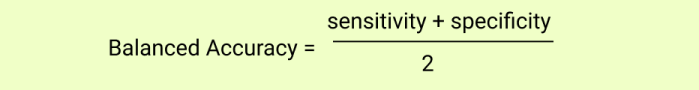


###Balanced accuracy formula

###Sensitivity: This is also known as true positive rate or recall, it measures the proportion of real positives that are correctly predicted out of total positive prediction made by the model.

##Sensitivity= TP / (TP + FN)

###Specificity: Also known as true negative rate, it measures the proportion of correctly identified negatives over the total negative prediction made by the model.

##Specificity =TN / (TN + FP)

#RF

Accuracy score train: 0.922136408594457
Balance Accuracy score train: 0.8261706622415567
Accuracy score test: 0.8137205387205387
Balance Accuracy score test: 0.657937279272799

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.62      0.29      0.39       863
           2       0.85      0.78      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.66      0.69     11880
weighted avg       0.81      0.81      0.80     11880



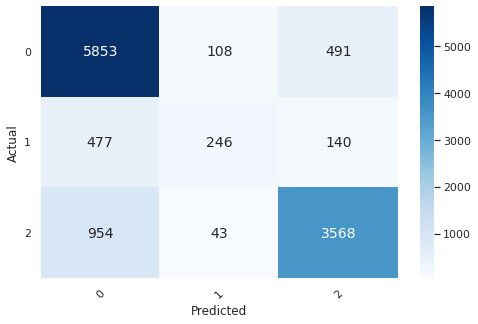

In [ ]:
#score model
best_model = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model,"Random Forest")

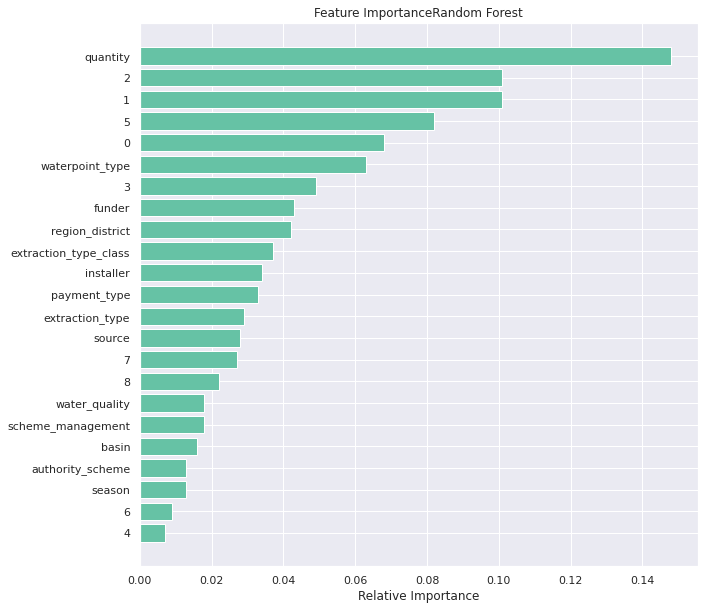

In [ ]:
feature_importances(best_model,"Random Forest")

In [ ]:
# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")

Accuracy:
TRAIN: 0.922136408594457
TEST: 0.8137205387205387

Balanced Accuracy:
TRAIN: 0.8261706622415567
TEST: 0.657937279272799


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
# setting grid search parameters and fit and run them
grid_p = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt','log2'],
 "criterion": ["gini", "entropy"],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,15],
 'n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(estimator = rf, param_distributions = grid_p, n_jobs = -1, cv = 5,  verbose = 2,  scoring = 'accuracy')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.8068352019617409
Parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy'}
Best Model: RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)


##submission

In [ ]:
y_pred_test

array([2, 0, 0, ..., 0, 0, 2])

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub



,status_group
0,2
1,0
2,0
3,2
4,0
...,...
14845,2
14846,0
14847,0
14848,0


In [ ]:
target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

,status_group
0,non functional
1,functional
2,functional
3,non functional
4,functional
...,...
14845,non functional
14846,functional
14847,functional
14848,functional


In [ ]:
id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

,id
0,50785
1,51630
2,17168
3,45559
4,49871
...,...
14845,39307
14846,18990
14847,28749
14848,33492


In [ ]:
finalsub = pd.concat([id,sub],axis = 1)
finalsub

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:

finalsub.to_csv('/content/Submission_rf_pipe.csv',index=False)

dd = pd.read_csv('/content/Submission_rf_pipe.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:

finalsub.to_csv('/content/Submission_manual_lbgm_pipe.csv',index=False)

dd = pd.read_csv('/content/Submission_manual_lbgm_pipe.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
finalsub['status_group'] = finalsub['status_group'].replace(target_status_group)
finalsub


,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
# setting grid search parameters and fit and run them
grid_p = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt','log2'],
 "criterion": ["gini", "entropy"],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,15],
 'n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(estimator = rf, param_distributions = grid_p, n_jobs = -1, cv = 5,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.6646082990114554
Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 80, 'criterion': 'entropy'}
Best Model: RandomForestClassifier(criterion='entropy', max_depth=80, max_features='log2',
                       min_samples_split=5)


#Random forest 0.8196 c reseult

##accuracy

Accuracy score train: 0.9171068414739367
Accuracy score test: 0.8152356902356902

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.65      0.28      0.39       863
           2       0.85      0.78      0.81      4565

    accuracy                           0.82     11880
   macro avg       0.77      0.66      0.69     11880
weighted avg       0.81      0.82      0.81     11880



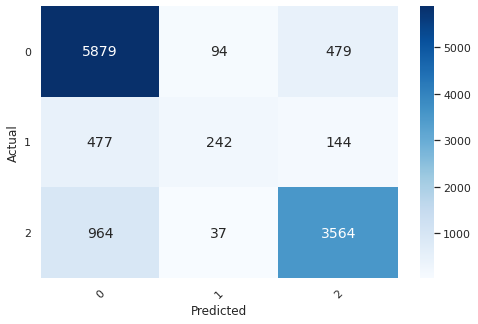

In [ ]:
#score model
best_model = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)
#best_model = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model,"Random Forest")

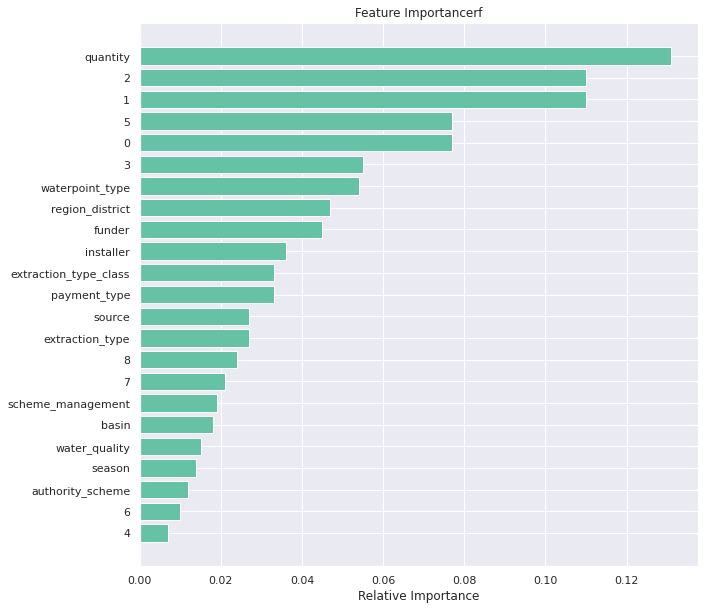

In [ ]:
feature_importances(best_model,'rf')

2:'latitude',1:'longitude',5:'age',0:'gps_height',3'population',8:'region_code',7'amount_tsh_missing',6:'permit',4:'public_meeting'

In [ ]:
# setting classifier
#best_model = RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=2, min_samples_leaf= 2,n_estimators=800, random_state=42, criterion= 'gini', warm_start=True)

best_model.fit(f_train_set, f_y_train)


# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9154194515059176

Balanced Accuracy:
TRAIN: 0.8087865627251881


In [ ]:
# 0.8196 c reseult

## balanced accuracy 0.8185

Accuracy score train: 0.9456427955133736
Balance Accuracy score train: 0.8793919446093558
Accuracy score test: 0.8124579124579124
Balance Accuracy score test: 0.660792917038007

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      6452
           1       0.58      0.30      0.39       863
           2       0.84      0.79      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.74      0.66      0.69     11880
weighted avg       0.81      0.81      0.80     11880



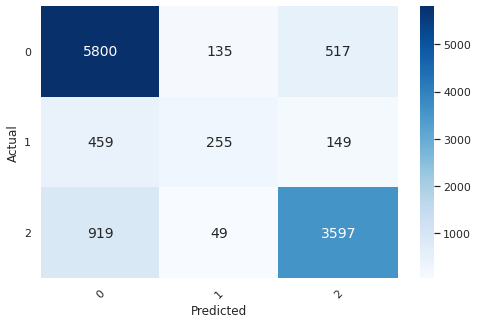

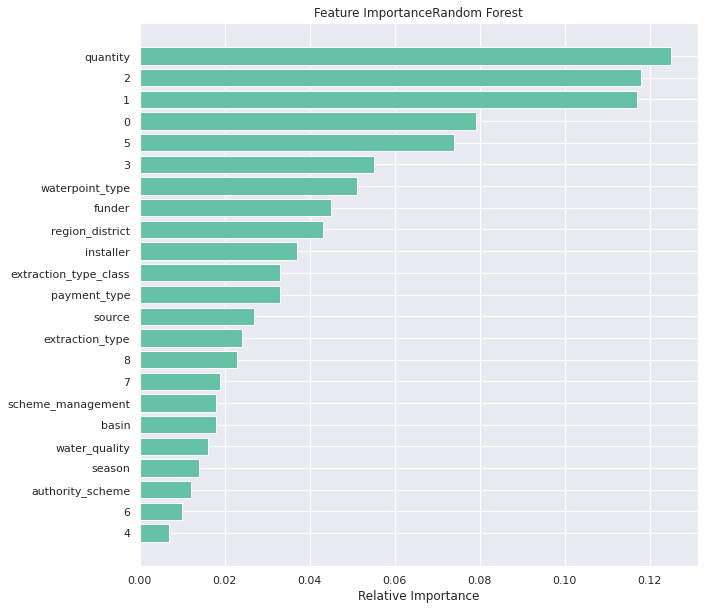

In [ ]:

#score model
best_model = RandomForestClassifier(criterion='entropy', max_depth=80, max_features='log2',
                       min_samples_split=5)
#best_model = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model,"Random Forest")

In [ ]:
best_model.fit(f_train_set, f_y_train)


# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9447465445546221

Balanced Accuracy:
TRAIN: 0.8767253468665022


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/rf_balanced_accuracy.csv',index=False)

dd = pd.read_csv('/content/rf_balanced_accuracy.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


##tpot rf 0.8202

In [ ]:
grid_p = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt','log2'],
 "criterion": ["gini", "entropy"],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,15],
 'n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

In [ ]:
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': grid_p}, 
                                 cv = 4, scoring = 'balanced_accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8046255675564751

Generation 2 - Current best internal CV score: 0.8046255675564751

Generation 3 - Current best internal CV score: 0.8046255675564751

Generation 4 - Current best internal CV score: 0.8046255675564751

Generation 5 - Current best internal CV score: 0.8047307686965908

Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': [10,
                                                                                      20,
                                                                                      30,
                                                                                      40,
                                                                                      50,
                                                                                      60,
                                                                                      70,
                                                                                      80,
                                                                                      90

In [ ]:
#RandomForestClassifier(criterion=gini, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200)

Accuracy score train: 0.9146657126623035
Accuracy score test: 0.814983164983165
----------
Balance Accuracy score train: 0.8070648232807692
Balance Accuracy score test: 0.6573952447575221
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.64      0.28      0.39       863
           2       0.85      0.78      0.82      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.66      0.69     11880
weighted avg       0.81      0.81      0.80     11880

--------------------------------------------------


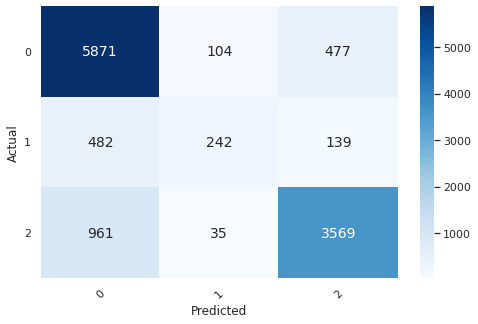

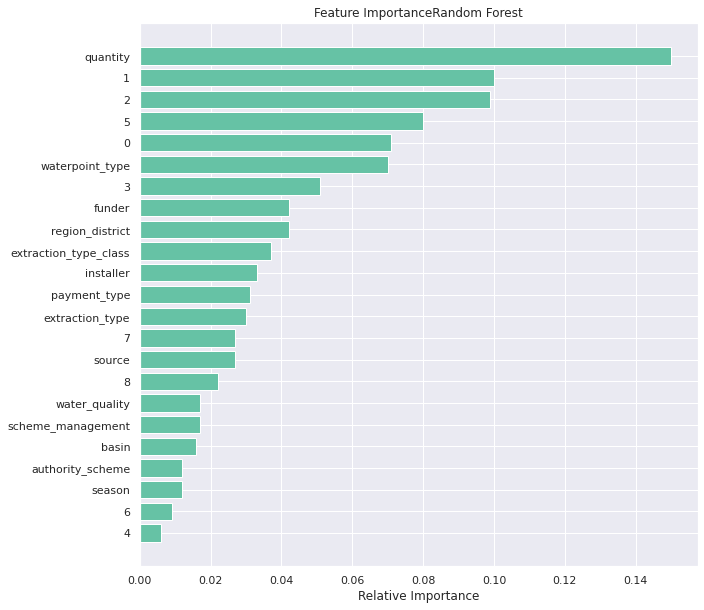

In [ ]:

#score model

best_model = RandomForestClassifier(criterion='gini', max_depth=90, max_features='log2', min_samples_leaf=2, min_samples_split=2, n_estimators=200)
#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*10)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))

# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)
print('-'*50)
feature_importances(best_model,"Random Forest")

In [ ]:
best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9140726274853112

Balanced Accuracy:
TRAIN: 0.8058936779738087


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/rf_tpot_balanced_accuracy.csv',index=False)

dd = pd.read_csv('/content/rf_tpot_balanced_accuracy.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#rs f1 0.8187

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
# setting grid search parameters and fit and run them
grid_p = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt','log2'],
 "criterion": ["gini", "entropy"],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,15],
 'n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(estimator = rf, param_distributions = grid_p, n_jobs = -1, cv = 5,  verbose = 2,  scoring = 'f1_micro')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.8061407530884275
Parameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 90, 'criterion': 'entropy'}
Best Model: RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2',
                       min_samples_split=5, n_estimators=800)


In [ ]:
RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2',
                       min_samples_split=5, n_estimators=800)

In [ ]:
import sklearn
from sklearn.metrics import f1_score

In [ ]:

#score model

best_model = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2',
                       min_samples_split=5, n_estimators=800)
#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
print('-'*10)
print("macro avg score train: {}".format(f1_score(y_train, y_pred_train,average='macro')))
print("macro score test: {}".format(f1_score(y_test, y_pred, average='macro')))

print('-'*10)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))

# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)
print('-'*50)
#feature_importances(best_model,"Random Forest")

Accuracy score train: 0.9473263326248448
Accuracy score test: 0.8126262626262626
----------
micro avg score train: 0.9473263326248448
micro avg score test: 0.8126262626262626
----------


TypeError: ignored

Accuracy score train: 0.9473263326248448
Accuracy score test: 0.8126262626262626
----------
micro avg score train: 0.9473263326248448
micro avg score test: 0.8126262626262626
----------
macro avg score train: 0.9080562989249957
macro score test: 0.6876468516354786
----------
Balance Accuracy score train: 0.8820724429742078
Balance Accuracy score test: 0.662063741706853
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      6452
           1       0.59      0.30      0.40       863
           2       0.85      0.79      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.66      0.69     11880
weighted avg       0.81      0.81      0.80     11880



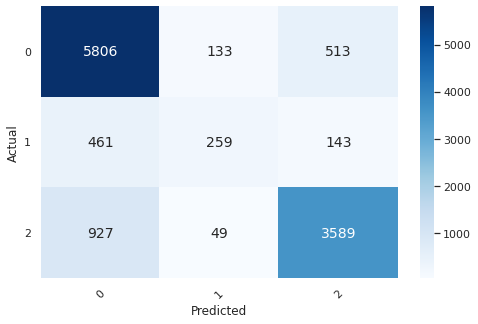

In [ ]:
#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
print('-'*10)
print("macro avg score train: {}".format(f1_score(y_train, y_pred_train,average='macro')))
print("macro score test: {}".format(f1_score(y_test, y_pred, average='macro')))

print('-'*10)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))

# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

In [ ]:
best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9475243690971229

Balanced Accuracy:
TRAIN: 0.8814274221496053


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/rf_tpot_micro_avg.csv',index=False)

dd = pd.read_csv('/content/rf_tpot_micro_avg.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

##tpot f1 rf 0.8203

In [ ]:
grid_p = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt','log2'],
 "criterion": ["gini", "entropy"],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,15],
 'n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

In [ ]:
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': grid_p}, 
                                 cv = 4, scoring = 'f1_micro')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8040573751092314

Generation 2 - Current best internal CV score: 0.8040573751092314

Generation 3 - Current best internal CV score: 0.8040573751092314

Generation 4 - Current best internal CV score: 0.8049622554926031

Generation 5 - Current best internal CV score: 0.8049622554926031

Best pipeline: RandomForestClassifier(input_matrix, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': [10,
                                                                                      20,
                                                                                      30,
                                                                                      40,
                                                                                      50,
                                                                                      60,
                                                                                      70,
                                                                                      80,
                                                                                      90

Accuracy score train: 0.916580736126602
Accuracy score test: 0.813973063973064
----------
micro avg score train: 0.916580736126602
micro avg score test: 0.813973063973064
----------
macro avg score train: 0.8489023289394727
macro score test: 0.6846630642820717
----------
Balance Accuracy score train: 0.812334502230895
Balance Accuracy score test: 0.6562271381722035
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.63      0.28      0.39       863
           2       0.85      0.78      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.66      0.68     11880
weighted avg       0.81      0.81      0.80     11880



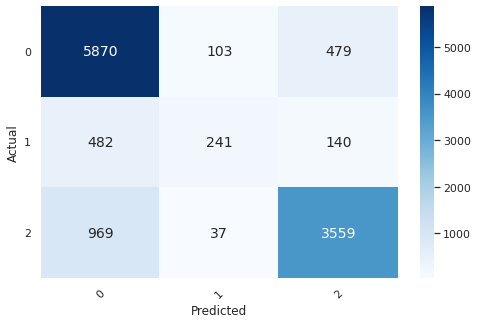

In [ ]:

#score model

best_model = RandomForestClassifier( criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200)
#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
print('-'*10)
print("macro avg score train: {}".format(f1_score(y_train, y_pred_train,average='macro')))
print("macro score test: {}".format(f1_score(y_test, y_pred, average='macro')))

print('-'*10)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))

# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

In [ ]:
best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9151332514015388

Balanced Accuracy:
TRAIN: 0.809407729232842


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/rf_tpot_micro.csv',index=False)

dd = pd.read_csv('/content/rf_tpot_micro.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional




```
# This is formatted as code
```

#lgbm2 0.8170


100%|██████████| 10/10 [06:15<00:00, 37.57s/it]


log_loss for n_estimators =  500 is 0.804040404040404
log_loss for n_estimators =  1500 is 0.8061447811447812
log_loss for n_estimators =  1800 is 0.8058080808080809
log_loss for n_estimators =  2000 is 0.8053030303030303
log_loss for n_estimators =  2200 is 0.8047979797979798
log_loss for n_estimators =  2400 is 0.8047979797979798
log_loss for n_estimators =  2600 is 0.8042087542087543
log_loss for n_estimators =  2800 is 0.8028619528619528
log_loss for n_estimators =  3000 is 0.8015151515151515
log_loss for n_estimators =  4000 is 0.8011784511784512


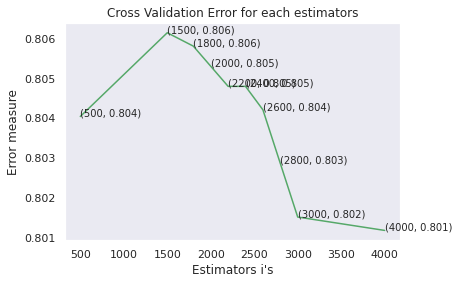

In [ ]:
from tqdm import tqdm

from sklearn.metrics import log_loss

from lightgbm import LGBMClassifier

estimators=[500,1500,1800,2000,2200,2400,2600,2800,3000,4000]
cv_log_error_array=[]
for i in tqdm(estimators):
    lgbm_clf=LGBMClassifier(n_estimators=i, n_jobs=-1)
    lgbm_clf.fit(X_train ,y_train )
    predict_y = lgbm_clf.predict(X_test )
    cv_log_error_array.append(accuracy_score(y_test , predict_y))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',estimators[i],'is',cv_log_error_array[i])


best_estimators = np.argmax(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)): 
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each estimators")
plt.xlabel("Estimators i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
estimators[best_estimators]

1500

In [ ]:
lgbm_clf=LGBMClassifier(n_estimators=estimators[best_estimators],nthread=-1,n_jobs=-1)


lgbm_clf.fit(f_train_set, f_y_train)


# predictions of training set
y_pred = lgbm_clf.predict(f_train_set)

# predictions of test set
y_pred_test = lgbm_clf.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")

Accuracy:
TRAIN: 0.9098806377211738

Balanced Accuracy:
TRAIN: 0.8337996825274772


In [ ]:

sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

finalsub = pd.concat([id,sub],axis = 1)
finalsub

,id,status_group
0,50785,2
1,51630,0
2,17168,0
3,45559,2
4,49871,0
...,...,...
14845,39307,2
14846,18990,0
14847,28749,0
14848,33492,0


#tpot

#Xgboost 0.8195

100%|██████████| 5/5 [04:07<00:00, 49.56s/it]


log_loss for n_estimators =  10 is 0.7275252525252526
log_loss for n_estimators =  300 is 0.7688552188552189
log_loss for n_estimators =  500 is 0.776010101010101
log_loss for n_estimators =  800 is 0.7798821548821548
log_loss for n_estimators =  1000 is 0.7824915824915825


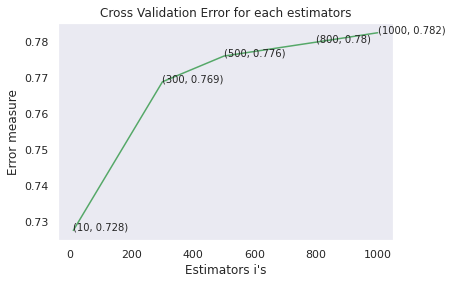

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier

estimators=[10,300,500,800,1000]
cv_log_error_array=[]
for i in tqdm(estimators):
    x_cfl=XGBClassifier(n_estimators=i, n_jobs=-1)
    x_cfl.fit(X_train ,y_train )
    predict_y = x_cfl.predict(X_test )
    cv_log_error_array.append(accuracy_score(y_test , predict_y,))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',estimators[i],'is',cv_log_error_array[i])

best_estimators = np.argmax(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)): 
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each estimators")
plt.xlabel("Estimators i's")
plt.ylabel("Error measure")
plt.show()

100%|██████████| 6/6 [15:47<00:00, 157.85s/it]


log_loss for n_estimators =  10 is 0.7275252525252526
log_loss for n_estimators =  1000 is 0.7824915824915825
log_loss for n_estimators =  1500 is 0.789057239057239
log_loss for n_estimators =  2000 is 0.792003367003367
log_loss for n_estimators =  2500 is 0.7934343434343434
log_loss for n_estimators =  3000 is 0.794949494949495


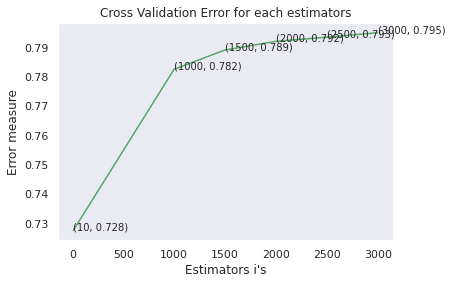

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier

estimators=[10,1000,1500,2000,2500,3000]
cv_log_error_array=[]
for i in tqdm(estimators):
    x_cfl=XGBClassifier(n_estimators=i, n_jobs=-1)
    x_cfl.fit(X_train ,y_train )
    predict_y = x_cfl.predict(X_test )
    cv_log_error_array.append(accuracy_score(y_test , predict_y,))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',estimators[i],'is',cv_log_error_array[i])

best_estimators = np.argmax(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)): 
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each estimators")
plt.xlabel("Estimators i's")
plt.ylabel("Error measure")
plt.show()

100%|██████████| 5/5 [28:57<00:00, 347.47s/it]


log_loss for n_estimators =  10 is 0.7275252525252526
log_loss for n_estimators =  3000 is 0.794949494949495
log_loss for n_estimators =  4000 is 0.794949494949495
log_loss for n_estimators =  5000 is 0.7964646464646464
log_loss for n_estimators =  6000 is 0.796969696969697


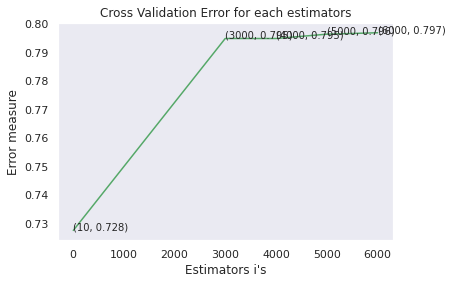

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier

estimators=[10,3000,4000,5000,6000]
cv_log_error_array=[]
for i in tqdm(estimators):
    x_cfl=XGBClassifier(n_estimators=i, n_jobs=-1)
    x_cfl.fit(X_train ,y_train )
    predict_y = x_cfl.predict(X_test )
    cv_log_error_array.append(accuracy_score(y_test , predict_y,))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',estimators[i],'is',cv_log_error_array[i])

best_estimators = np.argmax(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)): 
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each estimators")
plt.xlabel("Estimators i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
estimators[best_estimators]

6000

In [ ]:
x_cfl=XGBClassifier(n_estimators=estimators[best_estimators],nthread=-1,n_jobs=-1)

x_cfl.fit(f_train_set, f_y_train,verbose=True)


# predictions of training set
y_pred = x_cfl.predict(f_train_set)

# predictions of test set
y_pred_test = x_cfl.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")

Accuracy:
TRAIN: 0.8673883398710416

Balanced Accuracy:
TRAIN: 0.7560194662962121


In [ ]:
# Create training and test sets: test size 0.2
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier

param_grid = { 'n_estimators': [ 200, ],
              'colsample_bytree' :[  0.3, ],
              'eta': [0.2,],
             'max_depth': [12]}


#Create a based model
xgb =     XGBClassifier( random_state=42)

grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_xgb .fit(X_train, y_train,  eval_metric = 'mlogloss',)

#print best parameters 
print('Best Score:', grid_search_xgb .best_score_)
print('Parameters:', grid_search_xgb .best_params_)
print('Best Model:', grid_search_xgb .best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=  34.9s
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=  29.4s
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=  29.5s
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=  29.9s
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=  29.5s
Best Score: 0.808308305794626
Parameters: {'colsample_bytree': 0.3, 'eta': 0.2, 'max_depth': 12, 'n_estimators': 200}
Best Model: XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200,
              objective='multi:softprob', random_state=42)


In [ ]:
best_model = grid_search_xgb .best_estimator_
best_model

XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200,
              objective='multi:softprob', random_state=42)

Accuracy score train: 0.9190429091521286
Accuracy score test: 0.8127946127946128

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.63      0.28      0.39       863
           2       0.85      0.78      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



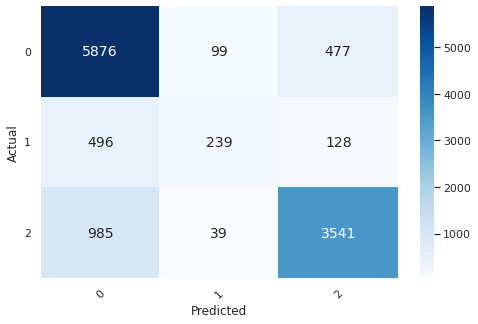

In [ ]:
#score model
best_model .fit(X_train, y_train,  eval_metric = 'mlogloss',)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

In [ ]:

best_model.fit(f_train_set, f_y_train)


# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")

Accuracy:
TRAIN: 0.9139547803835082

Balanced Accuracy:
TRAIN: 0.8193107062415801


In [ ]:

sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

finalsub = pd.concat([id,sub],axis = 1)
finalsub

,id,status_group
0,50785,2
1,51630,0
2,17168,0
3,45559,2
4,49871,0
...,...,...
14845,39307,2
14846,18990,0
14847,28749,0
14848,33492,0


In [ ]:

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
finalsub['status_group'] = finalsub['status_group'].replace(target_status_group)
finalsub


,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
finalsub.to_csv('/content/Submission_manual_xgb_pipe2.csv',index=False)

dd = pd.read_csv('/content/Submission_manual_xgb_pipe2.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#Catboost 0.8121

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 51 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# Create training and test sets: test size 0.2

param_grid = { 'max_depth': [ 7,8,9],
              'iterations': [1000, 750],
              'rsm' :[0.3, 0.2]}

#Create a based model
cat  =  CatBoostClassifier( random_state=42)

grid_search_cat = GridSearchCV(estimator = cat, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_cat .fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search_cat .best_score_)
print('Parameters:', grid_search_cat .best_params_)

Streaming output truncated to the last 5000 lines.
514:	learn: 0.3514581	total: 19.2s	remaining: 8.77s
515:	learn: 0.3513791	total: 19.2s	remaining: 8.73s
516:	learn: 0.3511917	total: 19.3s	remaining: 8.69s
517:	learn: 0.3509726	total: 19.3s	remaining: 8.65s
518:	learn: 0.3506725	total: 19.3s	remaining: 8.61s
519:	learn: 0.3503755	total: 19.4s	remaining: 8.57s
520:	learn: 0.3502284	total: 19.4s	remaining: 8.53s
521:	learn: 0.3499121	total: 19.5s	remaining: 8.5s
522:	learn: 0.3497388	total: 19.5s	remaining: 8.46s
523:	learn: 0.3495929	total: 19.5s	remaining: 8.42s
524:	learn: 0.3493864	total: 19.6s	remaining: 8.38s
525:	learn: 0.3492061	total: 19.6s	remaining: 8.34s
526:	learn: 0.3489438	total: 19.6s	remaining: 8.31s
527:	learn: 0.3487390	total: 19.7s	remaining: 8.27s
528:	learn: 0.3485352	total: 19.7s	remaining: 8.24s
529:	learn: 0.3483723	total: 19.7s	remaining: 8.2s
530:	learn: 0.3481037	total: 19.8s	remaining: 8.16s
531:	learn: 0.3478792	total: 19.8s	remaining: 8.13s
532:	learn: 0.3

In [ ]:
print('Best Model:', grid_search_cat .best_estimator_)

Best Model: <catboost.core.CatBoostClassifier object at 0x7fe91123a790>


In [ ]:
#score model
best_model = CatBoostClassifier( random_state=42, rsm = 0.3, max_depth =9, iterations = 1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

Learning rate set to 0.096348
0:	learn: 1.0250019	total: 40.1ms	remaining: 40.1s
1:	learn: 0.9663767	total: 77.7ms	remaining: 38.8s
2:	learn: 0.9187553	total: 114ms	remaining: 38s
3:	learn: 0.8802602	total: 157ms	remaining: 39.1s
4:	learn: 0.8468944	total: 212ms	remaining: 42.3s
5:	learn: 0.8180168	total: 251ms	remaining: 41.6s
6:	learn: 0.7933315	total: 297ms	remaining: 42.2s
7:	learn: 0.7733279	total: 336ms	remaining: 41.6s
8:	learn: 0.7556384	total: 380ms	remaining: 41.9s
9:	learn: 0.7393680	total: 425ms	remaining: 42s
10:	learn: 0.7257948	total: 460ms	remaining: 41.4s
11:	learn: 0.7137597	total: 498ms	remaining: 41s
12:	learn: 0.7017921	total: 543ms	remaining: 41.2s
13:	learn: 0.6925080	total: 583ms	remaining: 41.1s
14:	learn: 0.6819853	total: 620ms	remaining: 40.7s
15:	learn: 0.6733970	total: 665ms	remaining: 40.9s
16:	learn: 0.6657172	total: 723ms	remaining: 41.8s
17:	learn: 0.6579652	total: 771ms	remaining: 42.1s
18:	learn: 0.6518906	total: 817ms	remaining: 42.2s
19:	learn: 0.64

Accuracy score train: 0.878322355268419
Accuracy score test: 0.8051346801346801

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6452
           1       0.60      0.28      0.38       863
           2       0.84      0.77      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.65      0.68     11880
weighted avg       0.80      0.81      0.80     11880



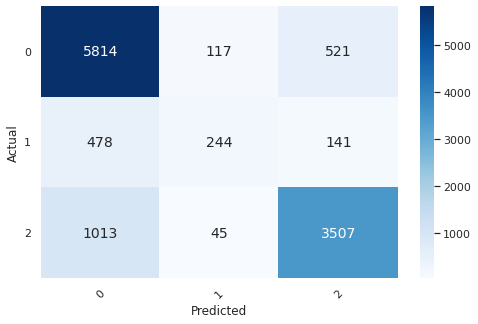

In [ ]:
#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_cat_pipe.csv',index=False)

dd = pd.read_csv('/content/Submission_cat_pipe.csv')
dd

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier



#Xgb voting 0.8207

In [ ]:
xgb1 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=42)
xgb2 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=2)
xgb3 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=142)
xgb4 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=52)
xgb5 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=600)

Accuracy score train: 0.9132767945453397
Accuracy score test: 0.8122053872053872
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.62      0.28      0.38       863
           2       0.86      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



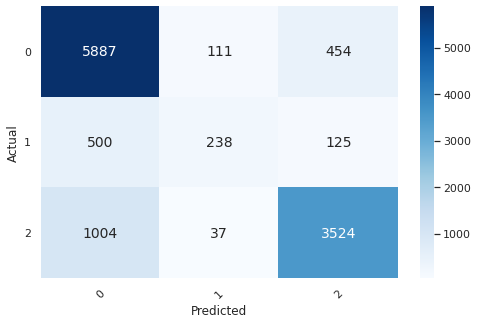

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')
                       

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [ ]:

vc.fit(f_train_set, f_y_train)


# predictions of training set
y_pred = vc.predict(f_train_set)

# predictions of test set
y_pred_test = vc.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9077425545884611

Balanced Accuracy:
TRAIN: 0.8039652539819565


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_xgb_voting_pipe.csv',index=False)

dd = pd.read_csv('/content/Submission_xgb_voting_pipe.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#RandomForest voting 0.8202

In [ ]:
rf1 = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt', min_samples_leaf=2, n_estimators=800,random_state=42)
rf2 = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt', min_samples_leaf=2, n_estimators=800,random_state=2)
rf3 = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt', min_samples_leaf=2, n_estimators=800,random_state=142)
rf4 = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt', min_samples_leaf=2, n_estimators=800,random_state=822)
rf5 = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt', min_samples_leaf=2, n_estimators=800,random_state=28)

Accuracy score train: 0.9171910183295103
Accuracy score test: 0.8153198653198653
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.64      0.28      0.39       863
           2       0.85      0.78      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.77      0.66      0.69     11880
weighted avg       0.81      0.82      0.81     11880



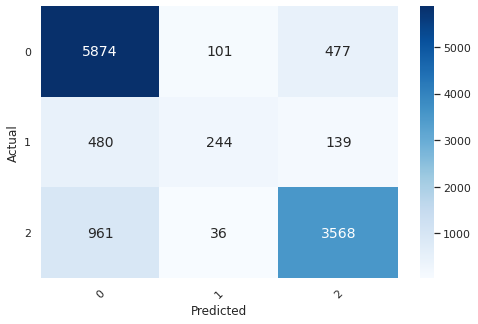

In [ ]:
vcrf = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5)], voting = 'soft')
                       

#fit and predict
vcrf.fit(X_train , y_train)
pred= vcrf .predict(X_test)
pred_train = vcrf .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


In [ ]:

vcrf.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = vcrf.predict(f_train_set)

# predictions of test set
y_pred_test = vcrf.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9154867927069479

Balanced Accuracy:
TRAIN: 0.8083939042212394


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_rf_voting_pipe.csv',index=False)

dd = pd.read_csv('/content/Submission_rf_voting_pipe.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#RandomForest voting f1 0.8203

In [ ]:
# f1random forest
best_model = RandomForestClassifier( criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200)


In [ ]:
rf1 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=42)
rf2 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=2)
rf3 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=142)
rf4 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=822)
rf5 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=28)

Accuracy score train: 0.9171068414739367
Accuracy score test: 0.8151515151515152
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.65      0.28      0.39       863
           2       0.85      0.78      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.77      0.66      0.69     11880
weighted avg       0.81      0.82      0.81     11880



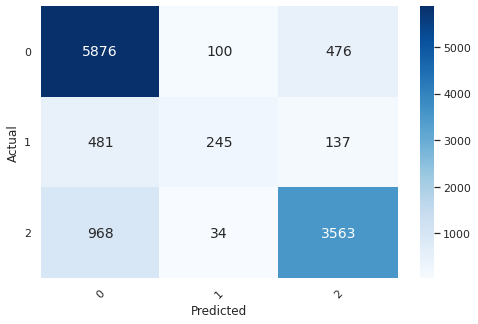

In [ ]:
vcrf = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5)], voting = 'soft')
                       

#fit and predict
vcrf.fit(X_train , y_train)
pred= vcrf .predict(X_test)
pred_train = vcrf .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


In [ ]:

vcrf.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = vcrf.predict(f_train_set)

# predictions of test set
y_pred_test = vcrf.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9150995808010236

Balanced Accuracy:
TRAIN: 0.8090242257240065


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/rf_voting_f1.csv',index=False)

dd = pd.read_csv('/content/rf_voting_f1.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#Weighted vote 0.8196

In [ ]:
rf = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=42)
xgb = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=11, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=42)

Accuracy score train: 0.9134241040425934
Accuracy score test: 0.8158249158249158
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.63      0.28      0.39       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.76      0.66      0.69     11880
weighted avg       0.81      0.82      0.81     11880



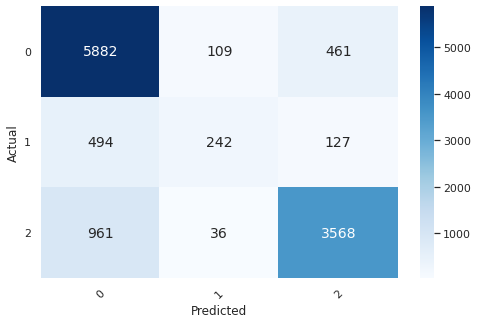

In [ ]:

vc_weight = VotingClassifier([('rf', rf), ('xgb', xgb)], voting = 'soft', weights = [0.87, 0.85, 1])
                       

#fit and predict
vc_weight.fit(X_train , y_train)
pred= vc_weight .predict(X_test)
pred_train = vc_weight .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [ ]:

vc_weight.fit(f_train_set, f_y_train)


# predictions of training set
y_pred = vc_weight.predict(f_train_set)

# predictions of test set
y_pred_test = vc_weight.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9112106264415226

Balanced Accuracy:
TRAIN: 0.8046187878736611


In [ ]:
"""
Accuracy:
=========
TRAIN: 0.9161602047172511

Balanced Accuracy:
==================
TRAIN: 0.8109745256354731
"""

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_weighted_voting_pipe.csv',index=False)

dd = pd.read_csv('/content/Submission_weighted_voting_pipe.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#RandomForest voting 10  0.8203

In [ ]:
rf1 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=42)
rf2 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=2)
rf3 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=142)
rf4 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=822)
rf5 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=28)
rf6 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=38)
rf7 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=125)
rf8 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=13)
rf9 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=84)
rf10 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=18)

Accuracy score train: 0.9171068414739367
Accuracy score test: 0.8154040404040404
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.64      0.28      0.39       863
           2       0.85      0.78      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.77      0.66      0.69     11880
weighted avg       0.81      0.82      0.81     11880



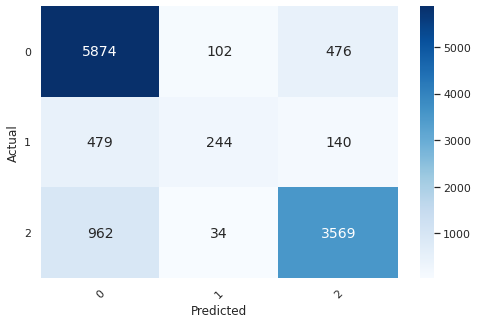

In [ ]:
from sklearn.ensemble import VotingClassifier
vcrf10 = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5),('rf6', rf6),('rf7', rf7),('rf8', rf8),('rf9', rf9),('rf10', rf10),], voting = 'soft')
                       
#fit and predict
vcrf10.fit(X_train , y_train)
pred= vcrf10 .predict(X_test)
pred_train = vcrf10 .predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


In [ ]:
vcrf10.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = vcrf10.predict(f_train_set)

# predictions of test set
y_pred_test = vcrf10.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9156719810097813

Balanced Accuracy:
TRAIN: 0.8091094973212517


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_rf_voting_10_pipe.csv',index=False)

dd = pd.read_csv('/content/Submission_rf_voting_10_pipe.csv')
dd

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#tpot xgboost 0.8204

In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 3.1 MB/s 
     |████████████████████████████████| 193.7 MB 35 kB/s 
     |████████████████████████████████| 160 kB 54.7 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=c1d85ddd1d51f99cb2206d625f684f3fba696bce6cd7f87650a681b0d37cc599
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid = { 'n_estimators': [100, 200, 300, 400, 500, 600, 700,],
              'colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'eta': [0.1,0.2,0.3,0.4,0.5],
             'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16]}

In [ ]:
from tpot import TPOTClassifier

tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'xgboost.XGBClassifier': param_grid}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8050043430346907

Generation 2 - Current best internal CV score: 0.8072350837414184

Generation 3 - Current best internal CV score: 0.8072350837414184

Generation 4 - Current best internal CV score: 0.8072350837414184

Generation 5 - Current best internal CV score: 0.8072350837414184

Best pipeline: XGBClassifier(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100)


TPOTClassifier(config_dict={'xgboost.XGBClassifier': {'colsample_bytree': [0.1,
                                                                           0.2,
                                                                           0.3,
                                                                           0.4,
                                                                           0.5],
                                                      'eta': [0.1, 0.2, 0.3,
                                                              0.4, 0.5],
                                                      'max_depth': [1, 2, 4, 6,
                                                                    8, 10, 12,
                                                                    14, 16],
                                                      'n_estimators': [100, 200,
                                                                       300, 400,
                                                   

In [ ]:
best_model = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=42)


Accuracy score train: 0.833919063953366
Accuracy score test: 0.7801346801346801

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      6452
           1       0.71      0.14      0.23       863
           2       0.83      0.71      0.77      4565

    accuracy                           0.78     11880
   macro avg       0.77      0.59      0.61     11880
weighted avg       0.78      0.78      0.76     11880



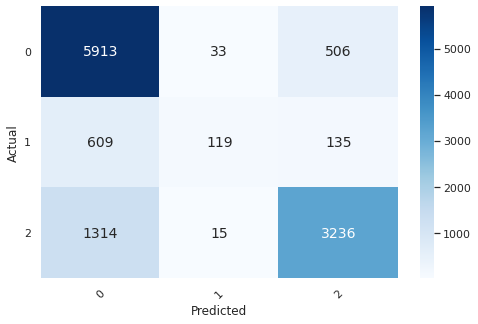

In [ ]:
#score model
best_model = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=42)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
# setting classifier
#best_model = RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=2, min_samples_leaf= 2,n_estimators=800, random_state=42, criterion= 'gini', warm_start=True)

best_model.fit(f_train_set, f_y_train)


# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.8312597855182747

Balanced Accuracy:
TRAIN: 0.6532206935444043


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_tpot_xgb.csv',index=False)

dd = pd.read_csv('/content/Submission_tpot_xgb.csv')
dd

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


##xgb micro avg

In [ ]:
#f1_micro

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid = { 'n_estimators': [100, 200, 300, 400, 500, 600, 700,],
              'colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'eta': [0.1,0.2,0.3,0.4,0.5],
             'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16]}

In [ ]:
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'xgboost.XGBClassifier': param_grid}, 
                                 cv = 4, scoring = 'f1_micro')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8075296805924385

Generation 2 - Current best internal CV score: 0.8075296805924385

Generation 3 - Current best internal CV score: 0.8075296805924385

Generation 4 - Current best internal CV score: 0.8075296805924385

Generation 5 - Current best internal CV score: 0.8075296805924385

Best pipeline: XGBClassifier(input_matrix, colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100)


TPOTClassifier(config_dict={'xgboost.XGBClassifier': {'colsample_bytree': [0.1,
                                                                           0.2,
                                                                           0.3,
                                                                           0.4,
                                                                           0.5],
                                                      'eta': [0.1, 0.2, 0.3,
                                                              0.4, 0.5],
                                                      'max_depth': [1, 2, 4, 6,
                                                                    8, 10, 12,
                                                                    14, 16],
                                                      'n_estimators': [100, 200,
                                                                       300, 400,
                                                   

Accuracy score train: 0.9246406700477704
Accuracy score test: 0.8143097643097643
----------
micro avg score train: 0.9246406700477704
micro avg score test: 0.8143097643097643
----------
macro avg score train: 0.8720141380347489
macro score test: 0.6806143961382932
----------
Balance Accuracy score train: 0.8376916227223147
Balance Accuracy score test: 0.6525896073017897
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.63      0.27      0.37       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



'Accuracy score train: 0.833919063953366\nAccuracy score test: 0.7801346801346801'

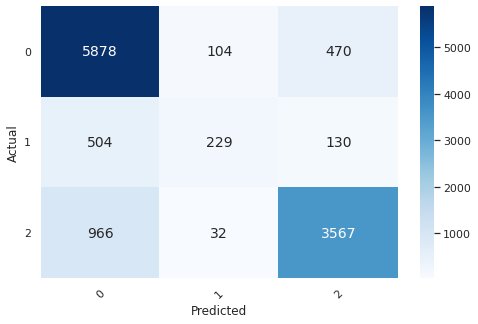

In [ ]:
#score model
best_model =XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
print('-'*10)
print("macro avg score train: {}".format(f1_score(y_train, y_pred_train,average='macro')))
print("macro score test: {}".format(f1_score(y_test, y_pred, average='macro')))

print('-'*10)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))

# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)
'''Accuracy score train: 0.833919063953366
Accuracy score test: 0.7801346801346801'''

In [ ]:
# setting classifier
#best_model = RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=2, min_samples_leaf= 2,n_estimators=800, random_state=42, criterion= 'gini', warm_start=True)

best_model.fit(f_train_set, f_y_train)


# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9186181585548578

Balanced Accuracy:
TRAIN: 0.8241754093125517


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_tpot_xgb_F1.csv',index=False)

dd = pd.read_csv('/content/Submission_tpot_xgb_F1.csv')
dd

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#Xgb voting f1 0.8206

In [ ]:
xgb1 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=42)
xgb2 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100,  random_state=2)
xgb3 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=142)
xgb4 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=52)
xgb5 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=600)

Accuracy score train: 0.9228519118668322
Accuracy score test: 0.8137205387205387
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.63      0.26      0.37       863
           2       0.86      0.78      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



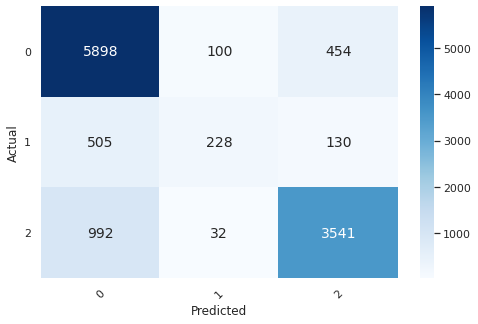

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')
                       

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [ ]:

vc.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = vc.predict(f_train_set)

# predictions of test set
y_pred_test = vc.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9167326049260088

Balanced Accuracy:
TRAIN: 0.818838632149105


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/xgb_voting_f1.csv',index=False)

dd = pd.read_csv('/content/xgb_voting_f1.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#lightgbm tpot 0.8119

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
param_grid = {
    'n_estimators': [100,200,300,400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [1,2,4,8,12,15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}


In [ ]:
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'lightgbm.LGBMClassifier': param_grid}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7975968009924993

Generation 2 - Current best internal CV score: 0.7975968009924993

Generation 3 - Current best internal CV score: 0.7975968009924993

Generation 4 - Current best internal CV score: 0.7987752698860535

Generation 5 - Current best internal CV score: 0.7987752698860535

Best pipeline: LGBMClassifier(input_matrix, colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20)


TPOTClassifier(config_dict={'lightgbm.LGBMClassifier': {'colsample_bytree': [0.7,
                                                                             0.8],
                                                        'max_depth': [1, 2, 4,
                                                                      8, 12, 15,
                                                                      20, 25],
                                                        'min_split_gain': [0.3,
                                                                           0.4],
                                                        'n_estimators': [100,
                                                                         200,
                                                                         300,
                                                                         400,
                                                                         700,
                                             

In [ ]:
best_model = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20)

Accuracy score train: 0.8526694585323765
Accuracy score test: 0.8052188552188552

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.63      0.26      0.37       863
           2       0.85      0.76      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.81      0.79     11880



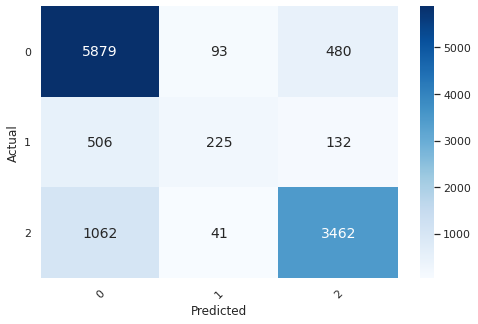

In [ ]:
#score model

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
# setting classifier
#best_model = RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=2, min_samples_leaf= 2,n_estimators=800, random_state=42, criterion= 'gini', warm_start=True)

best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.8593579016481759

Balanced Accuracy:
TRAIN: 0.7282311299931624


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_tpot_lightgbm.csv',index=False)

dd = pd.read_csv('/content/Submission_tpot_lightgbm.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#lightgbm f1 tpot 0.8086

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
param_grid = {
    'n_estimators': [100,200,300,400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [1,2,4,8,12,15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}


In [ ]:
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'lightgbm.LGBMClassifier': param_grid}, 
                                 cv = 4, scoring = 'f1_micro')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7984596274924796

Generation 2 - Current best internal CV score: 0.7984596274924796

Generation 3 - Current best internal CV score: 0.7984596274924796

Generation 4 - Current best internal CV score: 0.7984596274924796

Generation 5 - Current best internal CV score: 0.798838413599757

Best pipeline: LGBMClassifier(input_matrix, colsample_bytree=0.8, max_depth=12, min_split_gain=0.3, n_estimators=400, num_leaves=200, reg_alpha=1.1, reg_lambda=1.3, subsample=0.9, subsample_freq=20)


TPOTClassifier(config_dict={'lightgbm.LGBMClassifier': {'colsample_bytree': [0.7,
                                                                             0.8],
                                                        'max_depth': [1, 2, 4,
                                                                      8, 12, 15,
                                                                      20, 25],
                                                        'min_split_gain': [0.3,
                                                                           0.4],
                                                        'n_estimators': [100,
                                                                         200,
                                                                         300,
                                                                         400,
                                                                         700,
                                             

In [ ]:
# f1
best_model =  LGBMClassifier( colsample_bytree=0.8, max_depth=12, min_split_gain=0.3,
                             n_estimators=400, num_leaves=200, reg_alpha=1.1, reg_lambda=1.3, subsample=0.9,
                             subsample_freq=20)

Accuracy score train: 0.8460405311559587
Accuracy score test: 0.804040404040404

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      6452
           1       0.67      0.25      0.36       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.77      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



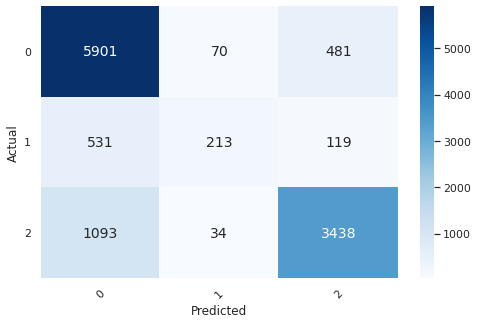

In [ ]:
#score model

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
# setting classifier

best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.8430444956985808

Balanced Accuracy:
TRAIN: 0.6969582066024964


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/tpot_lightgbm_f1.csv',index=False)

dd = pd.read_csv('/content/tpot_lightgbm_f1.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#lightgbm voting 0.8141

In [ ]:
lgbm1 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=2)
lgbm2 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=12)
lgbm3 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=22)
lgbm4 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=32)
lgbm5 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=42)

Accuracy score train: 0.8578463351501505
Accuracy score test: 0.8083333333333333
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.65      0.27      0.38       863
           2       0.85      0.76      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.80      0.81      0.80     11880



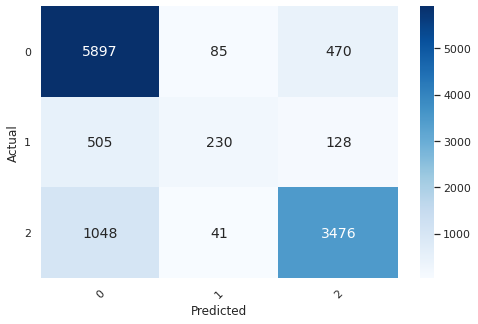

In [ ]:
from sklearn.ensemble import VotingClassifier

vc_lgbm = VotingClassifier([('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3), ('lgbm4', lgbm4), ('lgbm5', lgbm5)], voting = 'soft')

#fit and predict
vc_lgbm.fit(X_train , y_train)
pred= vc_lgbm .predict(X_test)
pred_train = vc_lgbm .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [ ]:

vc_lgbm.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = vc_lgbm.predict(f_train_set)

# predictions of test set
y_pred_test = vc_lgbm.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.8586844896378727

Balanced Accuracy:
TRAIN: 0.7244195436466168


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_lgbm_voting_pipe.csv',index=False)

dd = pd.read_csv('/content/Submission_lgbm_voting_pipe.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#Stacking

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier

xgb1 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=42)
xgb2 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=2)
xgb3 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=142)
xgb4 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=52)
xgb5 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=600)

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')


rf1 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=42)
rf2 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=2)
rf3 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=142)
rf4 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=822)
rf5 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=28)
rf6 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=38)
rf7 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=125)
rf8 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=13)
rf9 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=84)
rf10 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=18)

from sklearn.ensemble import VotingClassifier
vcrf10 = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5),('rf6', rf6),('rf7', rf7),('rf8', rf8),('rf9', rf9),('rf10', rf10),], voting = 'soft')

best_model = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=42)


In [ ]:
#machine learning
from sklearn.ensemble import StackingClassifier

Accuracy score train: 0.9152128622235316
Accuracy score test: 0.8172558922558922
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.65      0.29      0.40       863
           2       0.85      0.79      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.77      0.66      0.69     11880
weighted avg       0.81      0.82      0.81     11880



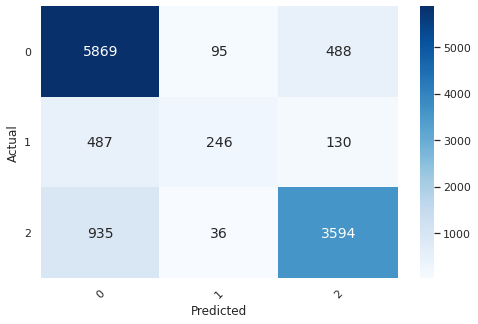

In [ ]:
#machine learning
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('rf', vcrf10), 
                              ('xgb', vc),
                            ('best_model',best_model)], final_estimator=LogisticRegression())

#fit and predict
stack.fit(X_train , y_train)
pred= stack.predict(X_test)
pred_train = stack.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


##Best 0.8229

In [ ]:
stack.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = stack.predict(f_train_set)

# predictions of test set
y_pred_test = stack.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9146955335948417

Balanced Accuracy:
TRAIN: 0.8042458465083726


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub

finalsub.to_csv('/content/Stacking_full.csv',index=False)

dd = pd.read_csv('/content/Stacking_full.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#lightgbm random search 0.8096

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
# setting grid search parameters and fit and run them
grid_p = {
    'n_estimators': [100,200,300,400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [1,2,4,8,12,15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

random_search_lgbm = RandomizedSearchCV(estimator = lgbm, param_distributions = grid_p, n_jobs = -1, cv = 5,  verbose = 2,  scoring = 'accuracy')
random_search_lgbm.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_lgbm.best_score_)
print('Parameters:', random_search_lgbm.best_params_)
print('Best Model:', random_search_lgbm.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.8012795644721088
Parameters: {'subsample_freq': 20, 'subsample': 0.9, 'reg_lambda': 1.3, 'reg_alpha': 1.3, 'num_leaves': 200, 'n_estimators': 200, 'min_split_gain': 0.3, 'max_depth': 25, 'colsample_bytree': 0.7}
Best Model: LGBMClassifier(colsample_bytree=0.7, max_depth=25, min_split_gain=0.3,
               n_estimators=200, num_leaves=200, reg_alpha=1.3, reg_lambda=1.3,
               subsample=0.9, subsample_freq=20)


In [ ]:
best_model =LGBMClassifier(colsample_bytree=0.7, max_depth=25, min_split_gain=0.3,
               n_estimators=200, num_leaves=200, reg_alpha=1.3, reg_lambda=1.3,
               subsample=0.9, subsample_freq=20)

Accuracy score train: 0.8469875207811612
Accuracy score test: 0.8047138047138047

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.66      0.25      0.36       863
           2       0.85      0.76      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



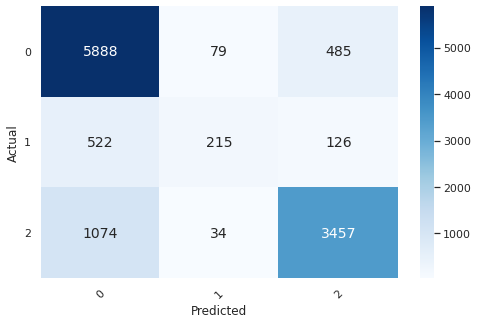

In [ ]:
#score model

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
# setting classifier
#best_model = RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=2, min_samples_leaf= 2,n_estimators=800, random_state=42, criterion= 'gini', warm_start=True)

best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.8455024495361875

Balanced Accuracy:
TRAIN: 0.6991490415321556


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Submission_rs_lightgbm.csv',index=False)

dd = pd.read_csv('/content/Submission_rs_lightgbm.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#Stacking2

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier

xgb1 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=42)
xgb2 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=2)
xgb3 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=142)
xgb4 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=52)
xgb5 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, min_child_weight=2,n_estimators=200, objective='multi:softprob', random_state=600)

# lightgbm

lgbm1 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=2)
lgbm2 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=12)
lgbm3 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=22)
lgbm4 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=32)
lgbm5 = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=42)

vc_lgbm = VotingClassifier([('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3), ('lgbm4', lgbm4), ('lgbm5', lgbm5)], voting = 'soft')


from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')


rf1 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=42)
rf2 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=2)
rf3 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=142)
rf4 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=822)
rf5 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=28)
rf6 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=38)
rf7 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=125)
rf8 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=13)
rf9 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=84)
rf10 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=18)

from sklearn.ensemble import VotingClassifier
vcrf10 = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5),('rf6', rf6),('rf7', rf7),('rf8', rf8),('rf9', rf9),('rf10', rf10),], voting = 'soft')

best_model = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=42)


In [ ]:
#machine learning
from sklearn.ensemble import StackingClassifier

Accuracy score train: 0.9132136619036596
Accuracy score test: 0.8176767676767677
              precision    recall  f1-score   support

           0       0.81      0.91      0.85      6452
           1       0.66      0.27      0.39       863
           2       0.85      0.79      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.77      0.66      0.69     11880
weighted avg       0.81      0.82      0.81     11880



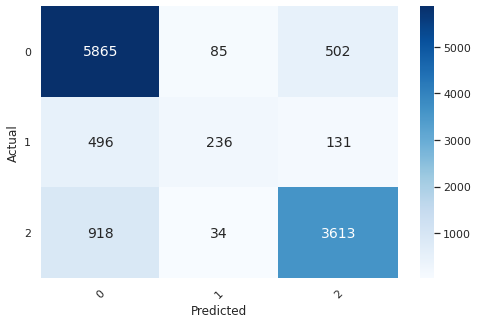

'\nprev\n\nAccuracy score train: 0.9152128622235316\nAccuracy score test: 0.8172558922558922\n'

In [ ]:
#machine learning
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('rf', vcrf10), 
                              ('xgb', vc),
                            ('best_model',best_model),
                            ('vc_lgbm',vc_lgbm)], final_estimator=LogisticRegression())

#fit and predict
stack.fit(X_train , y_train)
pred= stack.predict(X_test)
pred_train = stack.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

"""
Accuracy score train: 0.9152128622235316
Accuracy score test: 0.8172558922558922
"""

##Best 0.8228 training time is very high

In [ ]:
stack.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = stack.predict(f_train_set)

# predictions of test set
y_pred_test = stack.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9147292041953569

Balanced Accuracy:
TRAIN: 0.7975346491722753


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub

finalsub.to_csv('/content/Stacking_2.csv',index=False)

dd = pd.read_csv('/content/Stacking_2.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


# Bagging 0.8131

In [ ]:
from sklearn.ensemble import BaggingClassifier

param_grid = { 'n_estimators': [100, 200, 300, 400, 500, 700, 800, 900, 1000],
              'max_features': [0.2, 0.25, 0.3, 0.35, 0.4]}

#Create a based model
bag  =      BaggingClassifier( random_state=42, )

grid_search_bag = RandomizedSearchCV(estimator = bag, param_distributions = param_grid, cv =5, n_iter = 45,
                               verbose = 2, scoring = 'accuracy')

#fitmodel
grid_search_bag.fit(X_train, y_train )

#print best parameters 
print('Best Score:', grid_search_bag.best_score_)
print('Parameters:', grid_search_bag.best_params_)
print('Best Model:',grid_search_bag .best_estimator_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END .................max_features=0.2, n_estimators=100; total time=   3.8s
[CV] END .................max_features=0.2, n_estimators=100; total time=   3.7s
[CV] END .................max_features=0.2, n_estimators=100; total time=   3.7s
[CV] END .................max_features=0.2, n_estimators=100; total time=   3.8s
[CV] END .................max_features=0.2, n_estimators=100; total time=   3.7s
[CV] END .................max_features=0.2, n_estimators=200; total time=   7.6s
[CV] END .................max_features=0.2, n_estimators=200; total time=   7.5s
[CV] END .................max_features=0.2, n_estimators=200; total time=   7.6s
[CV] END .................max_features=0.2, n_estimators=200; total time=   7.6s
[CV] END .................max_features=0.2, n_estimators=200; total time=   8.3s
[CV] END .................max_features=0.2, n_estimators=300; total time=  11.1s
[CV] END .................max_features=0.2, n_e

In [ ]:
best_model = grid_search_bag .best_estimator_
best_model

BaggingClassifier(max_features=0.4, n_estimators=700, random_state=42)

Accuracy score train: 0.9656137544982007
Accuracy score test: 0.8081649831649832

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.61      0.26      0.37       863
           2       0.85      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.65      0.68     11880
weighted avg       0.80      0.81      0.80     11880



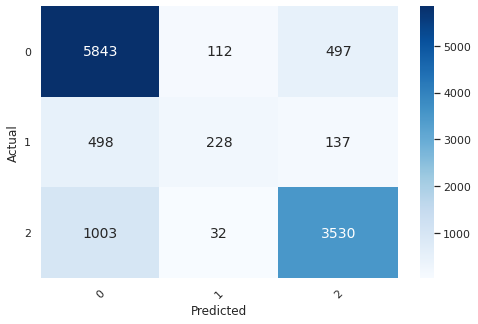

In [ ]:
#get scores
best_model = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)
#8079

In [ ]:
best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9606222326975201

Balanced Accuracy:
TRAIN: 0.908734457228924


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub

finalsub.to_csv('/content/Bagging.csv',index=False)

dd = pd.read_csv('/content/Bagging.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#Stacking3

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

#xgb
xgb1 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=42)
xgb2 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=2)
xgb3 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=142)
xgb4 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=52)
xgb5 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=600)

vc_xgb = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')
                       

# lightgbm

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=2)

#rf

rf1 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=42)
rf2 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=2)
rf3 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=142)
rf4 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=822)
rf5 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=28)
#rf

vcrf10 = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5),], voting = 'soft')

#bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )




Accuracy score train: 0.9229150445085124
Accuracy score test: 0.8169191919191919
              precision    recall  f1-score   support

           0       0.81      0.91      0.85      6452
           1       0.64      0.28      0.39       863
           2       0.85      0.79      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.77      0.66      0.69     11880
weighted avg       0.81      0.82      0.81     11880



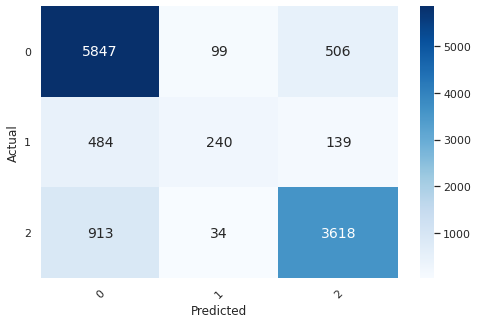

'\nAccuracy score train: 0.9152128622235316\nAccuracy score test: 0.8172558922558922\n'

In [ ]:
#machine learning
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('vcrf10', vcrf10),
                            ('vc_xgb',vc_xgb),
                            ('lgbm',lgbm),
                            ('bag',bag)], final_estimator=LogisticRegression())

#fit and predict
stack.fit(X_train , y_train)
pred= stack.predict(X_test)
pred_train = stack.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

"""
Accuracy score train: 0.9152128622235316
Accuracy score test: 0.8172558922558922
"""

##Best result in competition 0.8234 training time is very high

In [ ]:
stack.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = stack.predict(f_train_set)

# predictions of test set
y_pred_test = stack.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9240391252377986

Balanced Accuracy:
TRAIN: 0.8270788080983632


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub

finalsub.to_csv('/content/Stacking_3.csv',index=False)

dd = pd.read_csv('/content/Stacking_3.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


# stacking4 0.8234

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#xgb
xgb1 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=42)
xgb2 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=2)
xgb3 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=142)
xgb4 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=52)
xgb5 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=600)

vc_xgb = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')

# lightgbm

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=2)

#rf

rf1 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=42)
rf2 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=2)
rf3 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=142)
rf4 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=822)
rf5 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=28)
#rf

vcrf5 = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5),], voting = 'soft')

#bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )

#catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier( random_state=42, rsm = 0.3, max_depth =9, iterations = 1000)


stack = StackingClassifier([('vcrf5', vcrf5),
                            ('vc_xgb',vc_xgb),
                            ('lgbm',lgbm),
                            ('bag',bag),
                            ('cat',cat)], final_estimator=LogisticRegression())

Streaming output truncated to the last 5000 lines.
16:	learn: 0.6924097	total: 610ms	remaining: 35.3s
17:	learn: 0.6845452	total: 654ms	remaining: 35.7s
18:	learn: 0.6779284	total: 689ms	remaining: 35.6s
19:	learn: 0.6720487	total: 731ms	remaining: 35.8s
20:	learn: 0.6677616	total: 764ms	remaining: 35.6s
21:	learn: 0.6622753	total: 803ms	remaining: 35.7s
22:	learn: 0.6564280	total: 848ms	remaining: 36s
23:	learn: 0.6516570	total: 899ms	remaining: 36.6s
24:	learn: 0.6469184	total: 944ms	remaining: 36.8s
25:	learn: 0.6423602	total: 980ms	remaining: 36.7s
26:	learn: 0.6379796	total: 1.01s	remaining: 36.6s
27:	learn: 0.6353602	total: 1.06s	remaining: 36.7s
28:	learn: 0.6314246	total: 1.1s	remaining: 36.7s
29:	learn: 0.6283805	total: 1.14s	remaining: 36.8s
30:	learn: 0.6244061	total: 1.18s	remaining: 36.8s
31:	learn: 0.6217120	total: 1.22s	remaining: 36.8s
32:	learn: 0.6182425	total: 1.25s	remaining: 36.6s
33:	learn: 0.6151998	total: 1.29s	remaining: 36.6s
34:	learn: 0.6119420	total: 1.33s	

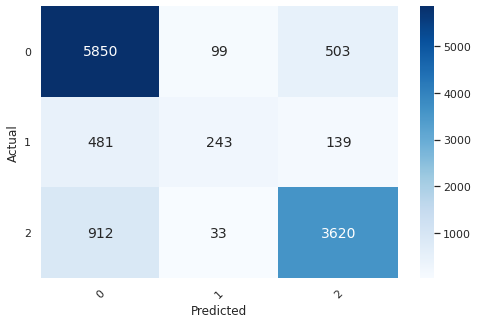

In [ ]:
#fit and predict
stack.fit(X_train , y_train)
pred= stack.predict(X_test)
pred_train = stack.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

# performs better on 0 check results with previous stacking2

In [ ]:
#
stack.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = stack.predict(f_train_set)

# predictions of test set
y_pred_test = stack.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")

"""

Accuracy:
=========
TRAIN: 0.9240391252377986

Balanced Accuracy:
==================
TRAIN: 0.8270788080983632

"""

Streaming output truncated to the last 5000 lines.
11:	learn: 0.7278976	total: 556ms	remaining: 45.8s
12:	learn: 0.7200952	total: 576ms	remaining: 43.8s
13:	learn: 0.7099924	total: 625ms	remaining: 44s
14:	learn: 0.7010439	total: 680ms	remaining: 44.6s
15:	learn: 0.6922354	total: 723ms	remaining: 44.5s
16:	learn: 0.6879097	total: 744ms	remaining: 43s
17:	learn: 0.6808495	total: 788ms	remaining: 43s
18:	learn: 0.6749079	total: 830ms	remaining: 42.8s
19:	learn: 0.6691990	total: 874ms	remaining: 42.8s
20:	learn: 0.6638705	total: 920ms	remaining: 42.9s
21:	learn: 0.6589198	total: 975ms	remaining: 43.4s
22:	learn: 0.6542893	total: 1.03s	remaining: 43.6s
23:	learn: 0.6494725	total: 1.07s	remaining: 43.5s
24:	learn: 0.6451631	total: 1.13s	remaining: 43.9s
25:	learn: 0.6406123	total: 1.17s	remaining: 43.8s
26:	learn: 0.6353611	total: 1.21s	remaining: 43.8s
27:	learn: 0.6321826	total: 1.26s	remaining: 43.8s
28:	learn: 0.6292379	total: 1.31s	remaining: 43.8s
29:	learn: 0.6264177	total: 1.36s	rem

'\nAccuracy:\n=========\nTRAIN: 0.9240391252377986\n\nBalanced Accuracy:\n==================\nTRAIN: 0.8270788080983632\n'

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub

finalsub.to_csv('/content/Stacking_4.csv',index=False)

dd = pd.read_csv('/content/Stacking_4.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


# stacking4 f1   0.8223

In [ ]:
RandomForestClassifier( criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200)

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#xgb
xgb1 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=42)
xgb2 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100,  random_state=2)
xgb3 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=142)
xgb4 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=52)
xgb5 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=600)

vc_xgb = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')

# lightgbm

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=2)

#rf

rf1 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=42)
rf2 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=2)
rf3 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=142)
rf4 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=822)
rf5 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=28)
#rf

vcrf5 = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5),], voting = 'soft')

#bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )

#catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier( random_state=42, rsm = 0.3, max_depth =9, iterations = 1000)


stack = StackingClassifier([('vcrf5', vcrf5),
                            ('vc_xgb',vc_xgb),
                            ('lgbm',lgbm),
                            ('bag',bag),
                            ('cat',cat)], final_estimator=LogisticRegression())

In [ ]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('vcrf10', vcrf10),
                            ('vc_xgb',vc_xgb),
                            ('lgbm',lgbm),
                            ('bag',bag)], final_estimator=LogisticRegression())

Streaming output truncated to the last 5000 lines.
16:	learn: 0.6924097	total: 603ms	remaining: 34.8s
17:	learn: 0.6845452	total: 641ms	remaining: 35s
18:	learn: 0.6779284	total: 679ms	remaining: 35.1s
19:	learn: 0.6720487	total: 714ms	remaining: 35s
20:	learn: 0.6677616	total: 745ms	remaining: 34.7s
21:	learn: 0.6622753	total: 782ms	remaining: 34.7s
22:	learn: 0.6564280	total: 824ms	remaining: 35s
23:	learn: 0.6516570	total: 857ms	remaining: 34.9s
24:	learn: 0.6469184	total: 904ms	remaining: 35.3s
25:	learn: 0.6423602	total: 937ms	remaining: 35.1s
26:	learn: 0.6379796	total: 971ms	remaining: 35s
27:	learn: 0.6353602	total: 1.01s	remaining: 35.1s
28:	learn: 0.6314246	total: 1.05s	remaining: 35.1s
29:	learn: 0.6283805	total: 1.08s	remaining: 35.1s
30:	learn: 0.6244061	total: 1.13s	remaining: 35.2s
31:	learn: 0.6217120	total: 1.16s	remaining: 35.1s
32:	learn: 0.6182425	total: 1.19s	remaining: 35s
33:	learn: 0.6151998	total: 1.23s	remaining: 35s
34:	learn: 0.6119420	total: 1.27s	remaining

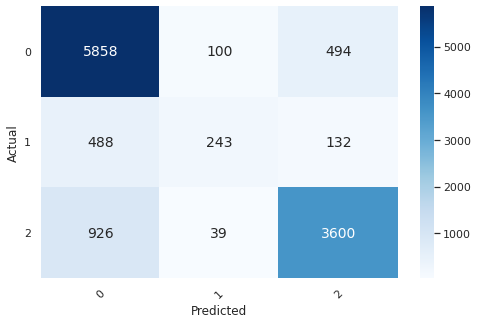

In [ ]:
#fit and predict
stack.fit(X_train , y_train)
pred= stack.predict(X_test)
pred_train = stack.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

# performs better on 0 check results with previous stacking2

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


#xgb
xgb1 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=42)
xgb2 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100,  random_state=2)
xgb3 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=142)
xgb4 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=52)
xgb5 = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=14, n_estimators=100, random_state=600)

vc_xgb = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')

# lightgbm

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=2)

#rf

rf1 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=42)
rf2 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=2)
rf3 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=142)
rf4 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=822)
rf5 = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200,random_state=28)
#rf

vcrf5 = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5),], voting = 'soft')

#bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )

#catboost
from catboost import CatBoostClassifier

#cat = CatBoostClassifier( random_state=42, rsm = 0.3, max_depth =9, iterations = 1000)


stack = StackingClassifier([('vcrf5', vcrf5),
                            ('vc_xgb',vc_xgb),
                            ('lgbm',lgbm),
                            ('bag',bag)], final_estimator=LogisticRegression())

In [ ]:
#
stack.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = stack.predict(f_train_set)

# predictions of test set
y_pred_test = stack.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")

"""

Accuracy:
=========
TRAIN: 0.9240391252377986

Balanced Accuracy:
==================
TRAIN: 0.8270788080983632

"""

Accuracy:
TRAIN: 0.9257563258640717

Balanced Accuracy:
TRAIN: 0.8395178845750743


'\n\nAccuracy:\n=========\nTRAIN: 0.9240391252377986\n\nBalanced Accuracy:\n==================\nTRAIN: 0.8270788080983632\n\n'

In [ ]:
Accuracy:
==================
TRAIN: 0.9240054546372835

Balanced Accuracy:
==================
TRAIN: 0.8274466121691001

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub

finalsub.to_csv('/content/Stacking_5f1.csv',index=False)

dd = pd.read_csv('/content/Stacking_5f1.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

#xgb
xgb1 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=42)
#xgb2 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=2)
#xgb3 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=142)
#xgb4 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=52)
#xgb5 = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=600)

#vc_xgb = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')
                       
# lightgbm

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3, n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20,random_state=2)

#rf

rf1 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=42)
#rf2 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=2)
#rf3 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=142)
#rf4 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=822)
#rf5 = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='log2', min_samples_leaf=2, n_estimators=400,random_state=28)
#rf

#vcrf10 = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3), ('rf4', rf4), ('rf5', rf5),], voting = 'soft')

#bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4)

In [ ]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('vcrf10', rf1),
                            ('vc_xgb',xgb1),
                            ('lgbm',lgbm),
                            ('bag',bag)], final_estimator=LogisticRegression())

In [ ]:
# https://michael-fuchs-python.netlify.app/2020/04/29/stacking-with-scikit-learn/
params = {'final_estimator__C': [10, 1.0, 0.1]}

In [ ]:
grid = GridSearchCV(estimator=stack, 
                    param_grid=params, 
                    cv=3,
                    refit=True)
grid.fit(X_train,y_train)

#SMOTE

## rf 0.8205

In [ ]:
# making over-sampling 
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_sampled, y_sample = smt.fit_resample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())

0    32259
2    22823
1     4317
Name: status_group, dtype: int64
0    32259
2    32259
1    32259
Name: status_group, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_sampled, y_sample, test_size = 0.2, random_state=42 , stratify=y_sample)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
# setting grid search parameters and fit and run them
grid_p = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt','log2'],
 "criterion": ["gini", "entropy"],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,15],
 'n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(estimator = rf, param_distributions = grid_p, n_jobs = -1, cv = 5,  verbose = 2,  scoring = 'accuracy')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.8490848778498906
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'gini'}
Best Model: RandomForestClassifier(max_depth=60, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=200)


Accuracy score train: 0.9451311659627233
Balance Accuracy score train: 0.9451311659627232
Accuracy score test: 0.8589067989253978
Balance Accuracy score test: 0.8589067989253977

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6452
           1       0.87      0.93      0.90      6452
           2       0.88      0.82      0.85      6452

    accuracy                           0.86     19356
   macro avg       0.86      0.86      0.86     19356
weighted avg       0.86      0.86      0.86     19356



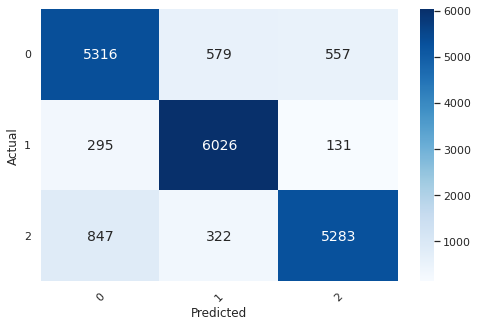

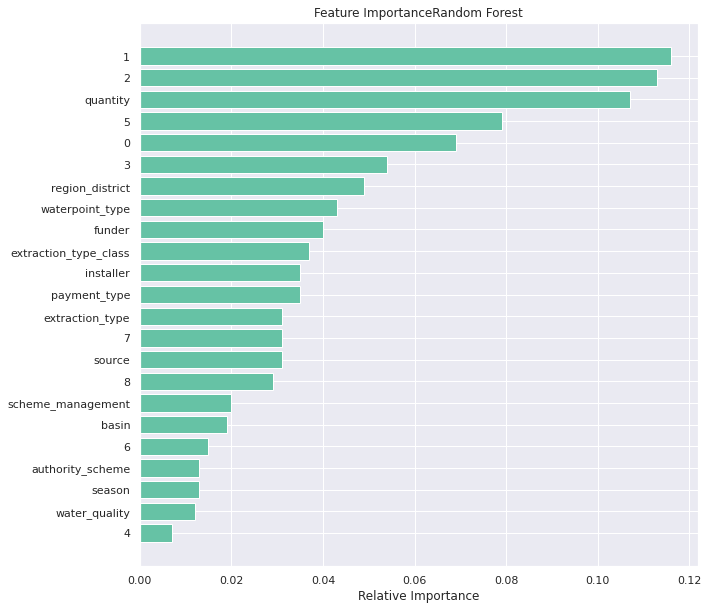

In [ ]:
#score model
best_model = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)



#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model,"Random Forest")

In [ ]:
# setting classifier
#best_model = RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=2, min_samples_leaf= 2,n_estimators=800, random_state=42, criterion= 'gini', warm_start=True)

best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9142746510884021

Balanced Accuracy:
TRAIN: 0.8053033430667021


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/rf.csv',index=False)

dd = pd.read_csv('/content/rf.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#SMOTE ENN

## rf 0.8210 2nd

In [ ]:
# making over-sampling 
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy = 'auto', n_jobs = -1)

X_sampled, y_sample = smt.fit_resample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())

0    32259
2    22823
1     4317
Name: status_group, dtype: int64
1    25464
2    21263
0    18037
Name: status_group, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_sampled, y_sample, test_size = 0.2, random_state=42 , stratify=y_sample)

Accuracy score train: 0.9464873871430232
Balance Accuracy score train: 0.9464873871430232
Accuracy score test: 0.8601983880967142
Balance Accuracy score test: 0.8601983880967142

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6452
           1       0.87      0.94      0.90      6452
           2       0.89      0.82      0.85      6452

    accuracy                           0.86     19356
   macro avg       0.86      0.86      0.86     19356
weighted avg       0.86      0.86      0.86     19356



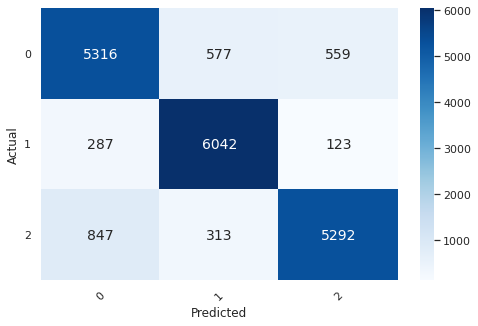

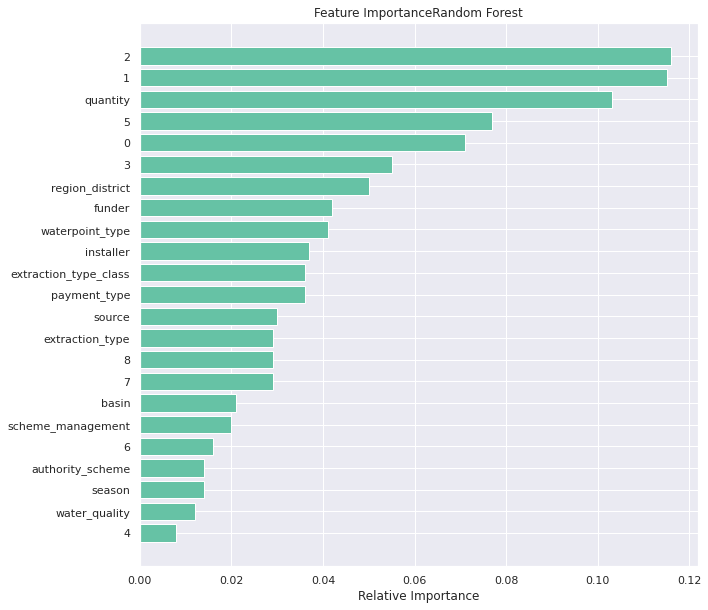

In [ ]:
#score model
best_model = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)
#best_model = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model,"Random Forest")

In [ ]:
# setting classifier
#best_model = RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=2, min_samples_leaf= 2,n_estimators=800, random_state=42, criterion= 'gini', warm_start=True)

best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")
"""
Accuracy:
=========
TRAIN: 0.9153521103048873

Balanced Accuracy:
==================
TRAIN: 0.8088918091009177
"""

Accuracy:
TRAIN: 0.915722486910554

Balanced Accuracy:
TRAIN: 0.8092003060476841


'\nAccuracy:\n=========\nTRAIN: 0.9153521103048873\n\nBalanced Accuracy:\n==================\nTRAIN: 0.8088918091009177\n'

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/rf_smoteenn2.csv',index=False)

dd = pd.read_csv('/content/rf_smoteenn2.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


# xgb smote 0.8195

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier

In [ ]:
Accuracy score train: 0.833919063953366
Accuracy score test: 0.7801346801346801

Accuracy score train: 0.955955102620736
Accuracy score test: 0.8654164083488324

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      6452
           1       0.89      0.93      0.91      6452
           2       0.89      0.82      0.85      6452

    accuracy                           0.87     19356
   macro avg       0.87      0.87      0.87     19356
weighted avg       0.87      0.87      0.87     19356



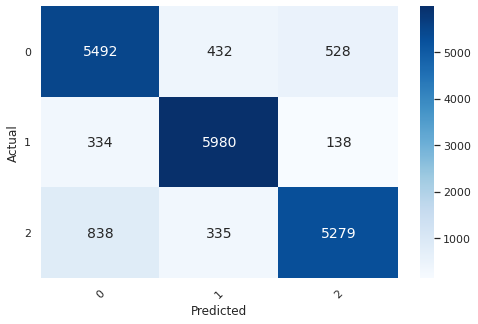

In [ ]:
#score model
#best_model = XGBClassifier(colsample_bytree=0.1, eta=0.5, max_depth=16, n_estimators=100, objective='multi:softprob', random_state=42)
best_model = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200,
                           objective='multi:softprob', random_state=42)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
# setting classifier
#best_model = RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=2, min_samples_leaf= 2,n_estimators=800, random_state=42, criterion= 'gini', warm_start=True)

best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9419182141113487

Balanced Accuracy:
TRAIN: 0.8766293155787827


In [ ]:
Accuracy:
=========
TRAIN: 0.9164800754221452

Balanced Accuracy:
==================
TRAIN: 0.8246877568925295

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/tpot_xgb_smote2.csv',index=False)

dd = pd.read_csv('/content/tpot_xgb_smote2.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


# stacking4 rf xgb smote 

In [ ]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier

xgb1 = XGBClassifier(colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200,
                           objective='multi:softprob', random_state=42)


rf1 = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)

lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3,
                            n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7,
                            subsample_freq=20)

bag = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )

stack = StackingClassifier([('rf1', rf1),
                            ('xgb1',xgb1),
                            ('lgbm',lgbm),
                            ('bag',bag)], final_estimator=LogisticRegression())

Accuracy score train: 0.9661978016300486
Accuracy score test: 0.873424261210994
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6452
           1       0.90      0.93      0.92      6452
           2       0.89      0.84      0.86      6452

    accuracy                           0.87     19356
   macro avg       0.87      0.87      0.87     19356
weighted avg       0.87      0.87      0.87     19356



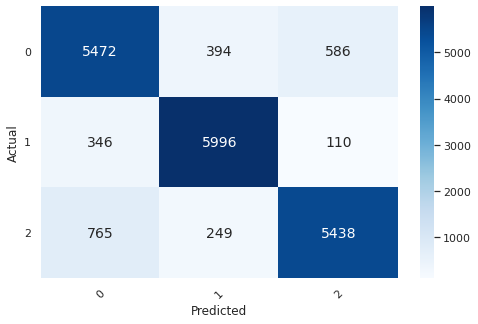

In [ ]:
#fit and predict
stack.fit(X_train , y_train)
pred= stack.predict(X_test)
pred_train = stack.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

# performs better on 0 check results with previous stacking2

In [ ]:
#
stack.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = stack.predict(f_train_set)

# predictions of test set
y_pred_test = stack.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")

"""
Accuracy:
=========
TRAIN: 0.9240054546372835

Balanced Accuracy:
==================
TRAIN: 0.8274466121691001
"""

Accuracy:
TRAIN: 0.9261772083705113

Balanced Accuracy:
TRAIN: 0.8269142671261185


'\nAccuracy:\n=========\nTRAIN: 0.9240054546372835\n\nBalanced Accuracy:\n==================\nTRAIN: 0.8274466121691001\n'

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub

finalsub.to_csv('/content/Stacking_smote_new.csv',index=False)

dd = pd.read_csv('/content/Stacking_smote_new.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


# lgbm smote 0.8119

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

best_model = LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.3,
                            n_estimators=1000, num_leaves=200, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7,
                            subsample_freq=20)

Accuracy score train: 0.8866586585035068
Accuracy score test: 0.8430977474684852

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6452
           1       0.85      0.92      0.88      6452
           2       0.88      0.80      0.84      6452

    accuracy                           0.84     19356
   macro avg       0.84      0.84      0.84     19356
weighted avg       0.84      0.84      0.84     19356



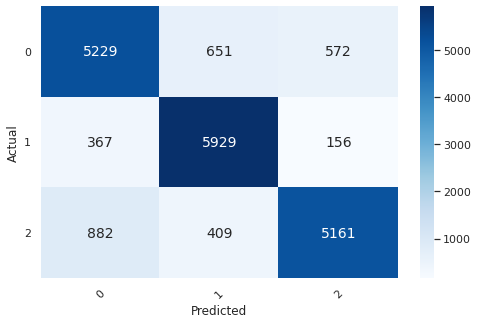

In [ ]:
#score model

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
# setting classifier
#best_model = RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=2, min_samples_leaf= 2,n_estimators=800, random_state=42, criterion= 'gini', warm_start=True)

best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.8593579016481759

Balanced Accuracy:
TRAIN: 0.7282311299931624


In [ ]:
Accuracy:
=========
TRAIN: 0.8593579016481759

Balanced Accuracy:
==================
TRAIN: 0.7282311299931624

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/tpot_lightgbm_smote.csv',index=False)

dd = pd.read_csv('/content/tpot_lightgbm_smote.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#bagging smote

In [ ]:
BaggingClassifier(max_features=0.4, n_estimators=700, random_state=42)

Accuracy score train: 0.9766084137378748
Accuracy score test: 0.8609216780326514

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      6452
           1       0.88      0.94      0.91      6452
           2       0.88      0.82      0.85      6452

    accuracy                           0.86     19356
   macro avg       0.86      0.86      0.86     19356
weighted avg       0.86      0.86      0.86     19356



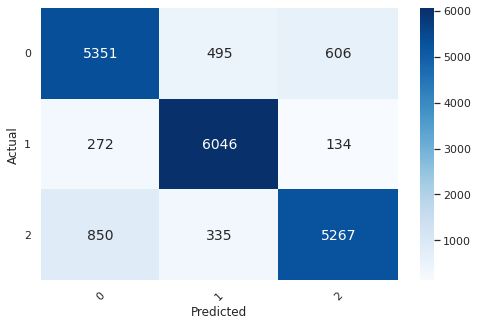

In [ ]:
from sklearn.ensemble import BaggingClassifier

#get scores
best_model = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)
#8079

In [ ]:
best_model.fit(f_train_set, f_y_train)

# predictions of training set
y_pred = best_model.predict(f_train_set)

# predictions of test set
y_pred_test = best_model.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(f_y_train, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(f_y_train, y_pred)}")


Accuracy:
TRAIN: 0.9606222326975201

Balanced Accuracy:
TRAIN: 0.908734457228924


In [ ]:
Accuracy:
=========
TRAIN: 0.9606222326975201

Balanced Accuracy:
==================
TRAIN: 0.908734457228924

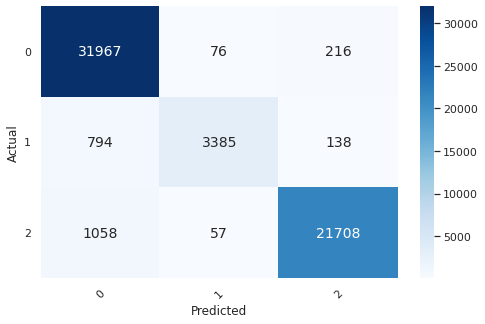

In [ ]:
confusion_matrix_plotter(f_y_train, y_pred)
#8079

In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub

finalsub.to_csv('/content/Bagging_smote.csv',index=False)

dd = pd.read_csv('/content/Bagging_smote.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional
